In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mpm
from scipy.optimize import curve_fit
from astropy import units as u
from astropy import constants as const
import matplotlib as mpl
from jupyterthemes import jtplot #These two lines can be skipped if you are not using jupyter themes
jtplot.reset()
import time
start_total = time.time()

In [2]:
import os
my_path = '/home/tomi/Documentos/Fisica/Tesis/escrito-tesis/images/'

In [3]:
r0 = 10.0*u.kpc
z0 = 1.*u.kpc
n0 = 40./(u.cm)**(3)
#n0 = 300./(u.cm)**(3)
Dl = 705.4019455128785*u.Mpc
Ds = 1760.3796178766652*u.Mpc
Dls = 1375.6149203241862*u.Mpc

In [4]:
theta_0 = (r0/Dl).decompose()*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 
print('Angular scale radius (theta_0 = r0/Dl): ',theta_0, 'arcsec')

Angular scale radius (theta_0 = r0/Dl):  2.9240748137875747 arcsec


## Primero chequeemos el integrador

### Integral del paper con plasma esferico haciendo cambio de variable

In [5]:
def Ne(theta,n0,R0):

    integ = lambda z_tilde: mpm.exp(-np.sqrt(theta**2/theta_0.value**2+z_tilde**2))
    
    upper_limit_0 = (Dls/R0).decompose().value
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)
    
    upper_limit_1 = 0.0
    lower_limit_1 = -(Dl/R0).decompose().value
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return (n0*R0).decompose().to(u.cm**(-2))*(integ_0+integ_1)

In [6]:
Ne_test = Ne(1,n0,r0)
print('Ne', Ne_test)

integ_0 = 0.899138816150974
integ_1 = 0.899138816150977
Ne 2.2195619901166e+24 1 / cm2


### Integral del paper con plasma esférico sin hacer cambio de variable

In [7]:
def Ne(theta,n0,r0):
    
    integ = lambda z_tilde: mpm.exp(-np.sqrt(theta**2*Dl.decompose().value**2+z_tilde**2)/r0)
    
    upper_limit_0 = Dls.decompose().value
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)

    upper_limit_1 = 0.0
    lower_limit_1 = -Dl.decompose().value
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return ((n0*(integ_0+integ_1))*u.m**(-2)).to(u.cm**(-2))

In [8]:
Ne_test = Ne(1*u.arcsec.to('rad'), n0.decompose().value, r0.decompose().value)
print('Ne', Ne_test)

integ_0 = 2.77445248764575e+20
integ_1 = 2.77445248764576e+20
Ne 2.219561990116602e+24 1 / cm2


### Rotated Galaxy

The gaussian edge-wise plasma profile has the form
$$
n(r,z) = n_{0}e^{-(\frac{r}{r_{0}})^2} e^{-(\frac{z}{z_0})^{2}} \\
r^2 = x^{2} + y^{2} .
$$

The x direction is the line of sight. Rotating this distribution through the z-direction does nothing, and through the x-direction amounts to rotate the source position and the orientation of sight. We then rotate it through the y-direction. 

<div>
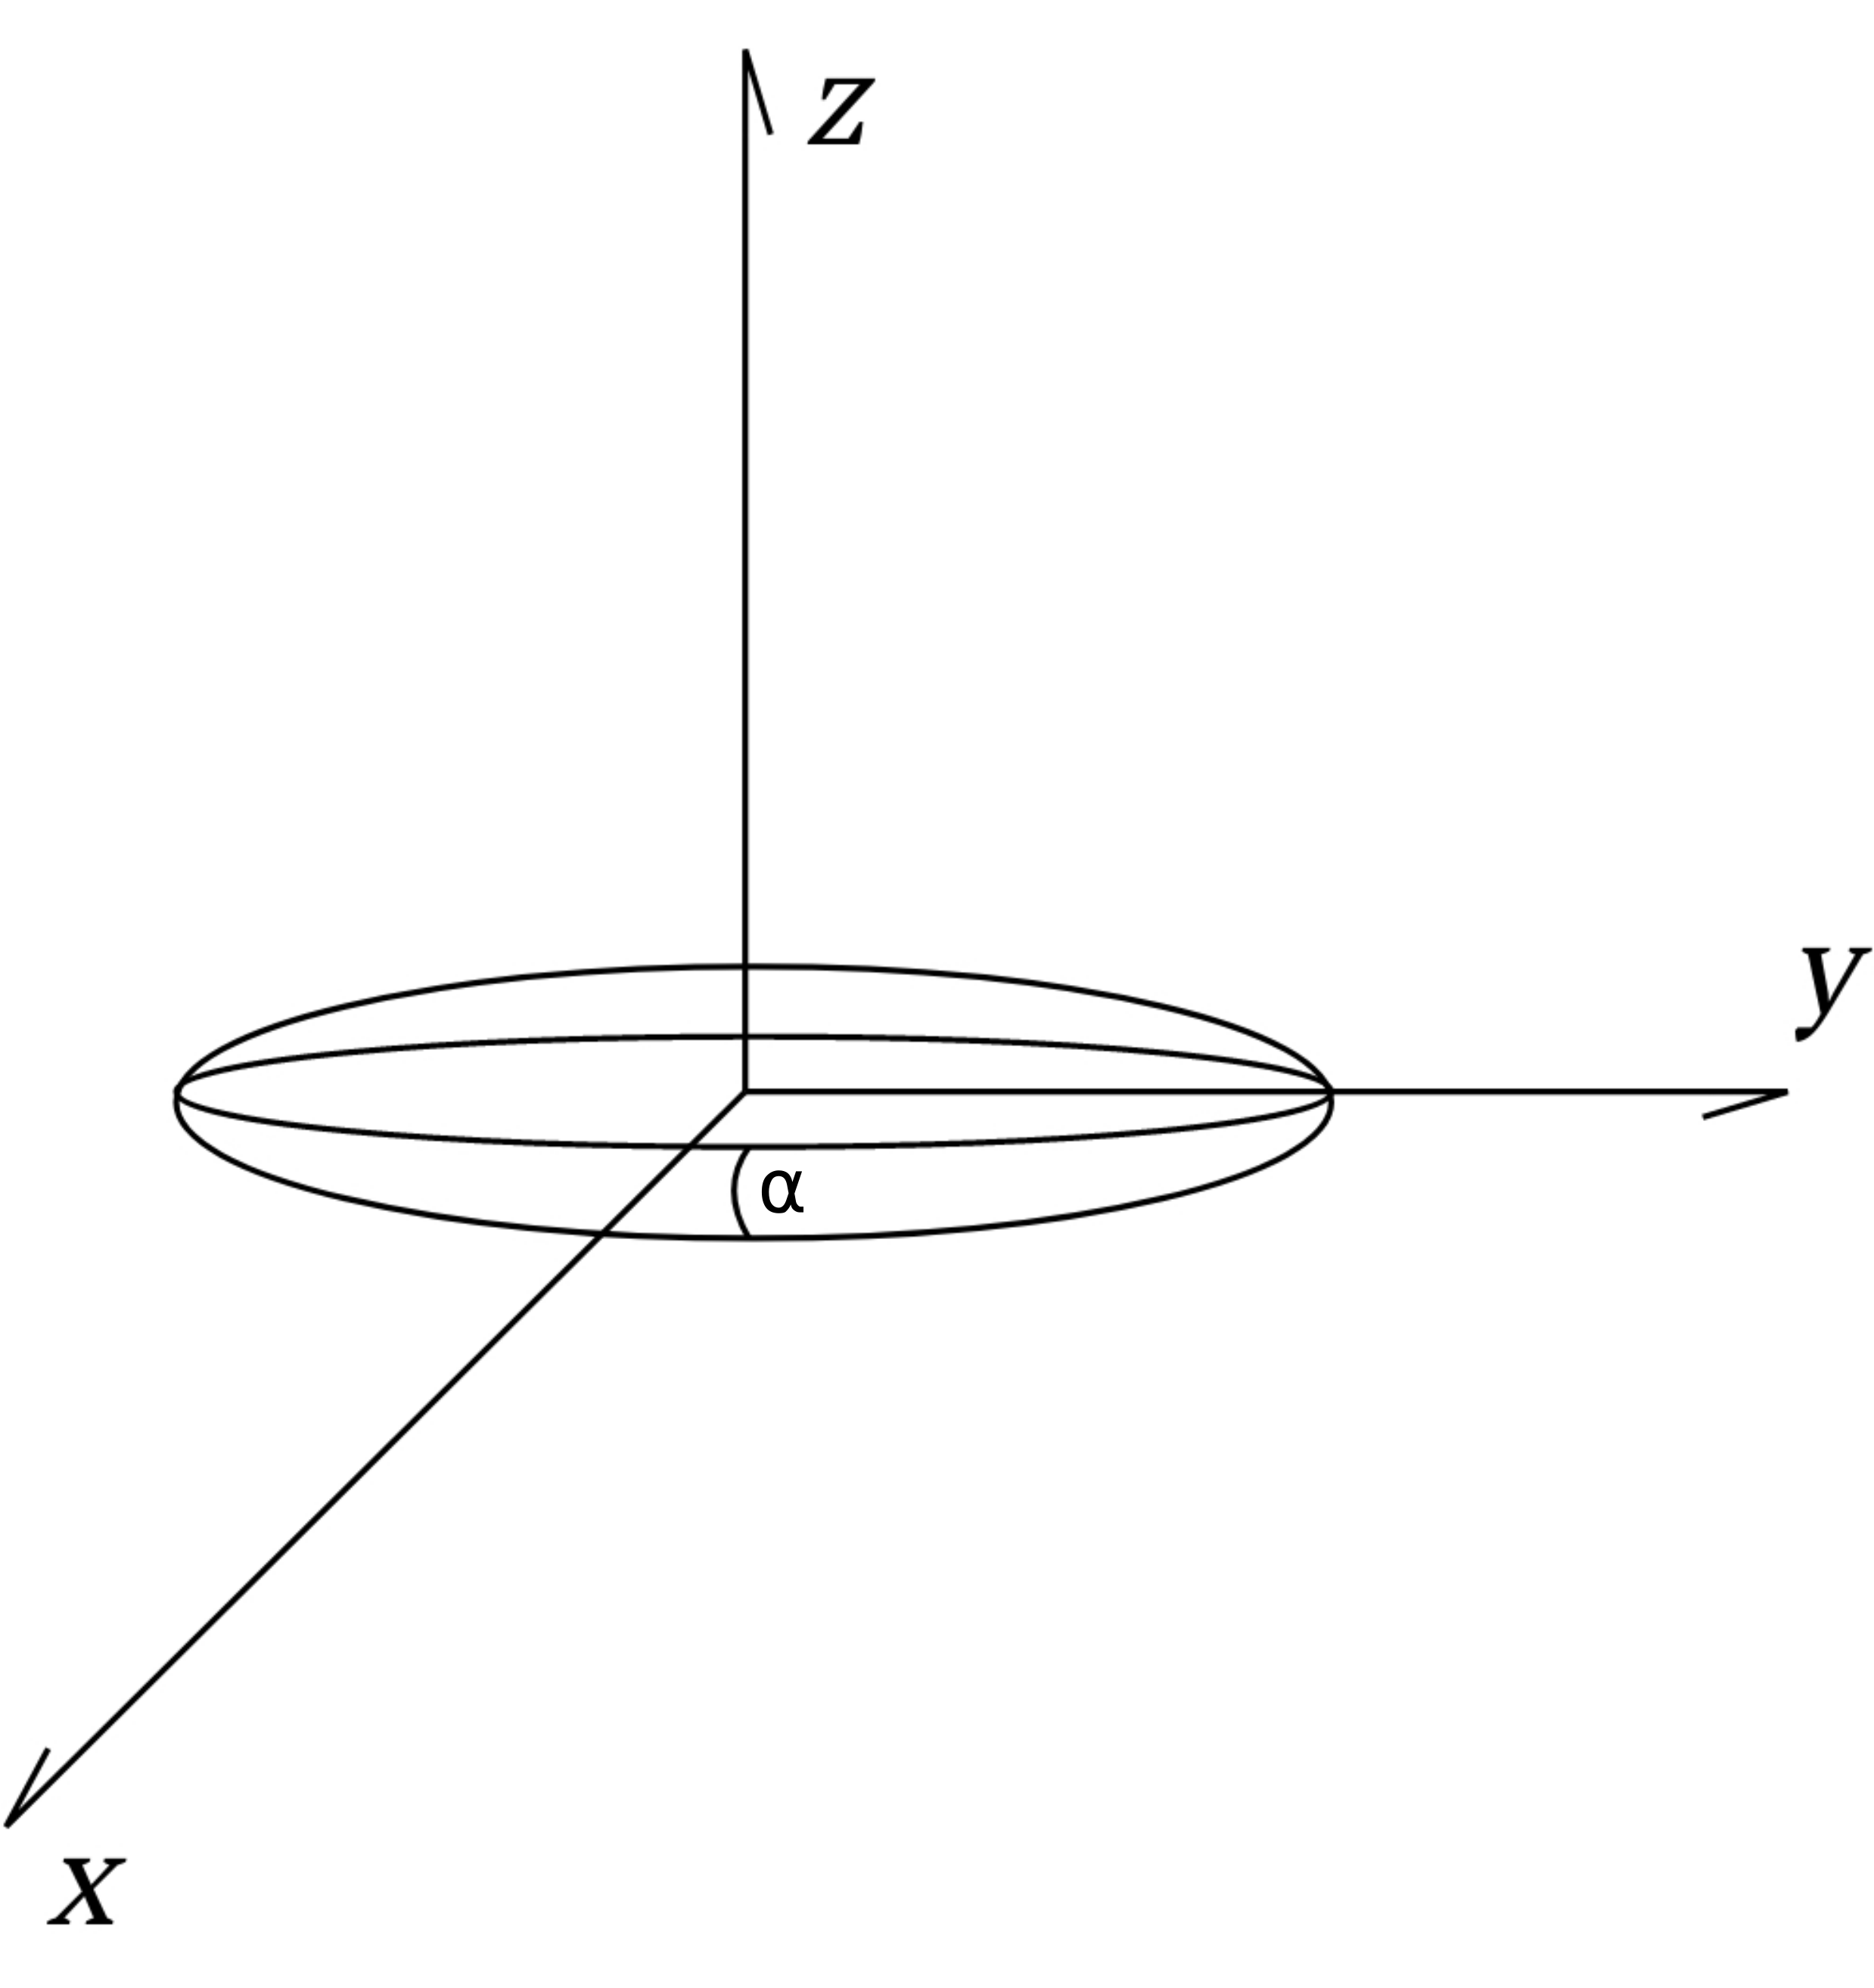
</div>
Me make

$$
z' = zcos\alpha - xsin\alpha \\
x' = zsin\alpha + xcos\alpha \\
z'^{2} = z^{2}cos^{2}\alpha + x^{2}sin^{2}\alpha - 2xzcos\alpha sin\alpha \\
x'^{2} = z^{2}sin^{2}\alpha + x^{2}cos^{2}\alpha + 2xzcos\alpha sin\alpha \\
n_{\alpha}(x,y,z) = n(x',y,z') = n_{0} exp( -\frac{z^{2}sin^{2}\alpha + x^{2}cos^{2}\alpha + 2xzcos\alpha sin\alpha + y^{2}}{r_0^2} ) exp( -(\frac{zcos\alpha}{z_{0}})^{2} ) exp( -(\frac{xsin\alpha}{z_{0}})^{2} ) exp (\frac{2xzcos\alpha sin\alpha}{z_{0}^{2}})
$$


In [9]:
def Ne(y,z,n0,r0,z0,alpha,Dl,Dls):

    integ = lambda x: mpm.exp( -( z**2*mpm.sin(alpha)**2 + x**2*mpm.cos(alpha)**2 +
                                                     2*x*z*mpm.cos(alpha)*mpm.sin(alpha) + y**2)/r0**2 )  * mpm.exp( -(z*mpm.cos(alpha)/z0)**2 ) \
                                                     *mpm.exp( -(x*mpm.sin(alpha)/z0)**2 ) *mpm.exp(2*x*z*mpm.cos(alpha)*mpm.sin(alpha)/z0**2)
    
    upper_limit_0 = Dls
    lower_limit_0 = 0.0
    integ_0 = mpm.quad(integ,[lower_limit_0,upper_limit_0])
    print('integ_0 =', integ_0)
    
    upper_limit_1 = 0.0
    lower_limit_1 = -Dl
    integ_1 = mpm.quad(integ,[lower_limit_1,upper_limit_1])
    print('integ_1 =', integ_1)
    
    return ((n0*(integ_0+integ_1))*u.m**(-2)).to(u.cm**(-2))

Test in a particular point

In [10]:
phi = np.pi/1
y = np.cos(phi)*1*u.arcsec*Dl
z = np.sin(phi)*1*u.arcsec*Dl
alpha = 0.*np.pi/180.

In [11]:
print('Ne =' ,Ne(y.decompose().value  ,   z.decompose().value,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value))

integ_0 = 2.43277575007787e+20
integ_1 = 2.43277575007869e+20
Ne = 1.9462206000626232e+24 1 / cm2


In [12]:
phi = 3/2*np.pi
y = np.cos(phi)*3*u.arcsec*Dl
z = np.sin(phi)*3*u.arcsec*Dl

Ne(y.decompose().value  ,   z.decompose().value,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value)

integ_0 = 3.7221925036771e-26
integ_1 = 8.08422090577912e-26


<Quantity 4.72256536e-22 1 / cm2>

## Integration

## Approach scipython.com - Now the y-z  plane is x-y.

In [13]:
# The two-dimensional domain of the fit.
x = np.arange(-3.,3.,0.1)*u.arcsec*Dl
y = np.arange(-3.,3.,0.1)*u.arcsec*Dl
x = x.decompose().value
y = y.decompose().value
X, Y = np.meshgrid(x, y)

In [14]:
# Our function to fit (the data to be fitted)
import time

def f(x,y):
    Ne_ = np.frompyfunc(Ne, 8, 1)
    output = Ne_(x,   y,   n0.decompose().value,   r0.decompose().value,
   z0.decompose().value,   alpha,   Dl.decompose().value,   Dls.decompose().value)
    for i in range(len(output)):
        for j in range(len(output)):
            output[i][j] = output[i][j].value                  
    return output

time1 = time.time()
Z = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 1.29914659670841e-26
integ_1 = 2.82161335460392e-26
integ_0 = 1.39195844615112e-26
integ_1 = 3.02319118617164e-26
integ_0 = 1.48791633957286e-26
integ_1 = 3.23160190305643e-26
integ_0 = 1.58677331144784e-26
integ_1 = 3.44630912142952e-26
integ_0 = 1.68824469393597e-26
integ_1 = 3.66669457189682e-26
integ_0 = 1.79200836009738e-26
integ_1 = 3.89205862773587e-26
integ_0 = 1.89770543420253e-26
integ_1 = 4.12162184761673e-26
integ_0 = 2.00494148871384e-26
integ_1 = 4.3545275753235e-26
integ_0 = 2.11328824054883e-26
integ_1 = 4.58984562386408e-26
integ_0 = 2.22228575159886e-26
integ_1 = 4.82657705477157e-26
integ_0 = 2.33144513029707e-26
integ_1 = 5.06366004563304e-26
integ_0 = 2.44025172244782e-26
integ_1 = 5.29997682024442e-26
integ_0 = 2.54816877071216e-26
integ_1 = 5.5343615966381e-26
integ_0 = 2.65464151326553e-26
integ_1 = 5.7656094889476e-26
integ_0 = 2.75910168339369e-26
integ_1 = 5.99248628006925e-26
integ_0 = 2.86097236336471e-26
integ_1 = 6.21373896377492e-26
integ_0 = 2

integ_0 = 2.87251779584709e-20
integ_1 = 6.23881446068919e-20
integ_0 = 2.84909669783973e-20
integ_1 = 6.18794623451326e-20
integ_0 = 2.81926423967232e-20
integ_1 = 6.12315319069582e-20
integ_0 = 2.78322622437087e-20
integ_1 = 6.04488231233179e-20
integ_0 = 2.74122929753361e-20
integ_1 = 5.9536692884001e-20
integ_0 = 2.69355813670377e-20
integ_1 = 5.85013240936909e-20
integ_0 = 2.64053223911771e-20
integ_1 = 5.7349655905145e-20
integ_0 = 2.58250235851101e-20
integ_1 = 5.60893063302717e-20
integ_0 = 2.51984664652598e-20
integ_1 = 5.47284884354546e-20
integ_0 = 2.45296655801376e-20
integ_1 = 5.32759214089056e-20
integ_0 = 2.38228258210476e-20
integ_1 = 5.17407378438896e-20
integ_0 = 2.3082298623047e-20
integ_1 = 5.01323886116936e-20
integ_0 = 2.2312537690569e-20
integ_1 = 4.84605467022161e-20
integ_0 = 2.15180548722365e-20
integ_1 = 4.67350113885802e-20
integ_0 = 2.07033767883117e-20
integ_1 = 4.49656140263967e-20
integ_0 = 1.98730027827249e-20
integ_1 = 4.31621267298776e-20
integ_0 = 1.

integ_1 = 9.34373678492909e-15
integ_0 = 8.98997357346929e-15
integ_1 = 8.98998094473624e-15
integ_0 = 8.62940242400658e-15
integ_1 = 8.6294094996257e-15
integ_0 = 8.2639401168833e-15
integ_1 = 8.26394689284412e-15
integ_0 = 7.89546535930626e-15
integ_1 = 7.89547183313873e-15
integ_0 = 7.52579588608761e-15
integ_1 = 7.52580205681214e-15
integ_0 = 7.15667457949418e-15
integ_1 = 7.15668044756024e-15
integ_0 = 6.78975707635848e-15
integ_1 = 6.78976264357306e-15
integ_0 = 6.42660096229849e-15
integ_1 = 6.42660623174572e-15
integ_0 = 6.06865662282743e-15
integ_1 = 6.06866159878065e-15
integ_0 = 5.71725979127186e-15
integ_1 = 5.71726447909967e-15
integ_0 = 5.37362580435754e-15
integ_1 = 5.37363021042503e-15
integ_0 = 5.03884554861748e-15
integ_1 = 5.0388496801842e-15
integ_0 = 4.71388305491864e-15
integ_1 = 4.71388692003461e-15
integ_0 = 1.71346383496194e-12
integ_1 = 1.71346383496251e-12
integ_0 = 1.83587476832308e-12
integ_1 = 1.8358747683237e-12
integ_0 = 1.96243506603996e-12
integ_1 = 1.

integ_1 = 1.47557892593557e-7
integ_0 = 1.57361620162112e-7
integ_1 = 1.57361620162164e-7
integ_0 = 1.67424620991041e-7
integ_1 = 1.67424620991097e-7
integ_0 = 1.77714949485551e-7
integ_1 = 1.77714949485611e-7
integ_0 = 1.88197015643069e-7
integ_1 = 1.88197015643132e-7
integ_0 = 1.9883170375885e-7
integ_1 = 1.98831703758917e-7
integ_0 = 2.0957654064579e-7
integ_1 = 2.0957654064586e-7
integ_0 = 2.20385913861691e-7
integ_1 = 2.20385913861765e-7
integ_0 = 2.31211339625984e-7
integ_1 = 2.31211339626061e-7
integ_0 = 2.42001779256921e-7
integ_1 = 2.42001779257002e-7
integ_0 = 2.52704002085773e-7
integ_1 = 2.52704002085857e-7
integ_0 = 2.63262991924096e-7
integ_1 = 2.63262991924185e-7
integ_0 = 2.73622393292385e-7
integ_1 = 2.73622393292477e-7
integ_0 = 2.8372499278256e-7
integ_1 = 2.83724992782655e-7
integ_0 = 2.93513230142219e-7
integ_1 = 2.93513230142317e-7
integ_0 = 3.02929732954304e-7
integ_1 = 3.02929732954406e-7
integ_0 = 3.11917868160054e-7
integ_1 = 3.11917868160159e-7
integ_0 = 3.20

integ_0 = 0.00968744477030013
integ_1 = 0.00968744477030337
integ_0 = 0.0099051256028275
integ_1 = 0.00990512560283081
integ_0 = 0.0101040355680276
integ_1 = 0.0101040355680309
integ_0 = 0.010282858923659
integ_1 = 0.0102828589236625
integ_0 = 0.0104403971763996
integ_1 = 0.0104403971764031
integ_0 = 0.0105755824480465
integ_1 = 0.0105755824480501
integ_0 = 0.0106874895252682
integ_1 = 0.0106874895252718
integ_0 = 0.0107753464027879
integ_1 = 0.0107753464027915
integ_0 = 0.0108385431519656
integ_1 = 0.0108385431519693
integ_0 = 0.0108766389722706
integ_1 = 0.0108766389722742
integ_0 = 0.0108893673116041
integ_1 = 0.0108893673116078
integ_0 = 0.0108766389722706
integ_1 = 0.0108766389722742
integ_0 = 0.0108385431519656
integ_1 = 0.0108385431519693
integ_0 = 0.0107753464027879
integ_1 = 0.0107753464027915
integ_0 = 0.0106874895252682
integ_1 = 0.0106874895252718
integ_0 = 0.0105755824480465
integ_1 = 0.0105755824480501
integ_0 = 0.0104403971763996
integ_1 = 0.0104403971764031
integ_0 = 0.

integ_1 = 86.2789060307043
integ_0 = 82.6249232280745
integ_1 = 82.6249232281021
integ_0 = 78.9408211985732
integ_1 = 78.9408211985996
integ_0 = 75.2447741057279
integ_1 = 75.2447741057531
integ_0 = 71.554207718779
integ_1 = 71.5542077188029
integ_0 = 67.8856755054722
integ_1 = 67.885675505495
integ_0 = 64.2547505931886
integ_1 = 64.2547505932101
integ_0 = 60.6759342960692
integ_1 = 60.6759342960895
integ_0 = 57.162581607253
integ_1 = 57.1625816072722
integ_0 = 53.7268437647987
integ_1 = 53.7268437648166
integ_0 = 50.3796277228667
integ_1 = 50.3796277228835
integ_0 = 47.1305721012007
integ_1 = 47.1305721012165
integ_0 = 3331.89026382845
integ_1 = 3331.89026382956
integ_0 = 3569.92259852386
integ_1 = 3569.92259852506
integ_0 = 3816.02351711107
integ_1 = 3816.02351711235
integ_0 = 4069.55963300155
integ_1 = 4069.55963300291
integ_0 = 4329.80086538135
integ_1 = 4329.8008653828
integ_0 = 4595.92106297746
integ_1 = 4595.921062979
integ_0 = 4866.99982577327
integ_1 = 4866.99982577489
integ_0

integ_0 = 25192734.4454583
integ_1 = 25192734.4454668
integ_0 = 25638600.7808189
integ_1 = 25638600.7808275
integ_0 = 26031396.247499
integ_1 = 26031396.2475077
integ_0 = 26368458.2685705
integ_1 = 26368458.2685793
integ_0 = 26647479.9782657
integ_1 = 26647479.9782746
integ_0 = 26866536.5096545
integ_1 = 26866536.5096635
integ_0 = 27024107.1069799
integ_1 = 27024107.1069889
integ_0 = 27119092.7073335
integ_1 = 27119092.7073426
integ_0 = 27150828.7073311
integ_1 = 27150828.7073401
integ_0 = 27119092.7073335
integ_1 = 27119092.7073426
integ_0 = 27024107.1069799
integ_1 = 27024107.1069889
integ_0 = 26866536.5096545
integ_1 = 26866536.5096635
integ_0 = 26647479.9782657
integ_1 = 26647479.9782746
integ_0 = 26368458.2685705
integ_1 = 26368458.2685793
integ_0 = 26031396.247499
integ_1 = 26031396.2475077
integ_0 = 25638600.7808189
integ_1 = 25638600.7808275
integ_0 = 25192734.4454583
integ_1 = 25192734.4454667
integ_0 = 24696785.4854509
integ_1 = 24696785.4854592
integ_0 = 24154034.4855355
int

integ_0 = 13741182921.4159
integ_1 = 13741182921.4205
integ_0 = 12915273719.3513
integ_1 = 12915273719.3557
integ_0 = 12110644071.4866
integ_1 = 12110644071.4906
integ_0 = 11329610983.6895
integ_1 = 11329610983.6933
integ_0 = 248696056016.97
integ_1 = 248696056017.053
integ_0 = 266463058575.824
integ_1 = 266463058575.913
integ_0 = 284832309357.951
integ_1 = 284832309358.046
integ_0 = 303756531672.336
integ_1 = 303756531672.438
integ_0 = 323181231461.664
integ_1 = 323181231461.772
integ_0 = 343044743860.948
integ_1 = 343044743861.063
integ_0 = 363278369172.429
integ_1 = 363278369172.55
integ_0 = 383806602004.162
integ_1 = 383806602004.291
integ_0 = 404547455986.216
integ_1 = 404547455986.351
integ_0 = 425412885016.696
integ_1 = 425412885016.839
integ_0 = 446309300423.772
integ_1 = 446309300423.921
integ_0 = 467138181787.198
integ_1 = 467138181787.354
integ_0 = 487796777474.809
integ_1 = 487796777474.972
integ_0 = 508178889249.894
integ_1 = 508178889250.065
integ_0 = 528175733630.318
int

integ_0 = 195157483046833.0
integ_1 = 195157483046898.0
integ_0 = 195385865240453.0
integ_1 = 195385865240519.0
integ_0 = 195157483046833.0
integ_1 = 195157483046898.0
integ_0 = 194473936923415.0
integ_1 = 194473936923480.0
integ_0 = 193340009564264.0
integ_1 = 193340009564328.0
integ_0 = 191763610170222.0
integ_1 = 191763610170286.0
integ_0 = 189755682575918.0
integ_1 = 189755682575981.0
integ_0 = 187330078726523.0
integ_1 = 187330078726586.0
integ_0 = 184503399550462.0
integ_1 = 184503399550524.0
integ_0 = 181294805785054.0
integ_1 = 181294805785114.0
integ_0 = 177725801770087.0
integ_1 = 177725801770146.0
integ_0 = 173819995620606.0
integ_1 = 173819995620664.0
integ_0 = 169602839517359.0
integ_1 = 169602839517416.0
integ_0 = 165101354105743.0
integ_1 = 165101354105799.0
integ_0 = 160343841167775.0
integ_1 = 160343841167829.0
integ_0 = 155359588824725.0
integ_1 = 155359588824777.0
integ_0 = 150178573540411.0
integ_1 = 150178573540461.0
integ_0 = 144831163128642.0
integ_1 = 1448311631

integ_0 = 1.55811077305951e+16
integ_1 = 1.55811077306004e+16
integ_0 = 1.49912037143281e+16
integ_1 = 1.49912037143331e+16
integ_0 = 1.43899343656553e+16
integ_1 = 1.43899343656602e+16
integ_0 = 1.37805087815622e+16
integ_1 = 1.37805087815668e+16
integ_0 = 1.31660597946679e+16
integ_1 = 1.31660597946723e+16
integ_0 = 1.2549618563256e+16
integ_1 = 1.25496185632602e+16
integ_0 = 1.1934091425471e+16
integ_1 = 1.1934091425475e+16
integ_0 = 1.13222392335921e+16
integ_1 = 1.13222392335959e+16
integ_0 = 1.07166593348877e+16
integ_1 = 1.07166593348913e+16
integ_0 = 1.01197703154097e+16
integ_1 = 1.01197703154131e+16
integ_0 = 9.53379957329704e+15
integ_1 = 9.53379957330023e+15
integ_0 = 8.9607737396948e+15
integ_1 = 8.9607737396978e+15
integ_0 = 8.40251191919901e+15
integ_1 = 8.40251191920183e+15
integ_0 = 7.86062167861676e+15
integ_1 = 7.86062167861939e+15
integ_0 = 5.35767933281787e+16
integ_1 = 5.35767933281966e+16
integ_0 = 5.74043531190424e+16
integ_1 = 5.74043531190616e+16
integ_0 = 6.1

integ_1 = 3.31776746694196e+17
integ_0 = 1.41642027597311e+18
integ_1 = 1.41642027597359e+18
integ_0 = 1.51761023077445e+18
integ_1 = 1.51761023077496e+18
integ_0 = 1.622230222257e+18
integ_1 = 1.62223022225754e+18
integ_0 = 1.73001099137096e+18
integ_1 = 1.73001099137154e+18
integ_0 = 1.84064217337256e+18
integ_1 = 1.84064217337318e+18
integ_0 = 1.9537725629935e+18
integ_1 = 1.95377256299415e+18
integ_0 = 2.06901088887056e+18
integ_1 = 2.06901088887125e+18
integ_0 = 2.1859271185786e+18
integ_1 = 2.18592711857934e+18
integ_0 = 2.30405430801491e+18
integ_1 = 2.30405430801568e+18
integ_0 = 2.42289100055833e+18
integ_1 = 2.42289100055914e+18
integ_0 = 2.54190417250714e+18
integ_1 = 2.54190417250799e+18
integ_0 = 2.66053271194398e+18
integ_1 = 2.66053271194487e+18
integ_0 = 2.77819140856226e+18
integ_1 = 2.77819140856319e+18
integ_0 = 2.89427542230879e+18
integ_1 = 2.89427542230976e+18
integ_0 = 3.00816518915728e+18
integ_1 = 3.00816518915828e+18
integ_0 = 3.11923171313826e+18
integ_1 = 3.

integ_0 = 3.12010950985623e+19
integ_1 = 3.12010950985728e+19
integ_0 = 3.23530920665108e+19
integ_1 = 3.23530920665217e+19
integ_0 = 3.34692423970127e+19
integ_1 = 3.34692423970239e+19
integ_0 = 3.45430039272753e+19
integ_1 = 3.45430039272869e+19
integ_0 = 3.5567918803353e+19
integ_1 = 3.55679188033649e+19
integ_0 = 3.65376774614939e+19
integ_1 = 3.65376774615061e+19
integ_0 = 3.74461828258125e+19
integ_1 = 3.7446182825825e+19
integ_0 = 3.82876138167261e+19
integ_1 = 3.82876138167389e+19
integ_0 = 3.90564872502649e+19
integ_1 = 3.9056487250278e+19
integ_0 = 3.97477172110313e+19
integ_1 = 3.97477172110446e+19
integ_0 = 4.03566710016397e+19
integ_1 = 4.03566710016532e+19
integ_0 = 4.08792208088878e+19
integ_1 = 4.08792208089015e+19
integ_0 = 4.13117902812828e+19
integ_1 = 4.13117902812966e+19
integ_0 = 4.16513952830263e+19
integ_1 = 4.16513952830403e+19
integ_0 = 4.18956781749363e+19
integ_1 = 4.18956781749503e+19
integ_0 = 4.20429350714515e+19
integ_1 = 4.20429350714656e+19
integ_0 = 4

integ_1 = 1.68110526948575e+20
integ_0 = 1.69492485353341e+20
integ_1 = 1.69492485353398e+20
integ_0 = 1.70486548438089e+20
integ_1 = 1.70486548438146e+20
integ_0 = 1.71085782562329e+20
integ_1 = 1.71085782562386e+20
integ_0 = 1.71285994953413e+20
integ_1 = 1.7128599495347e+20
integ_0 = 1.71085782562329e+20
integ_1 = 1.71085782562386e+20
integ_0 = 1.70486548438089e+20
integ_1 = 1.70486548438146e+20
integ_0 = 1.69492485353341e+20
integ_1 = 1.69492485353397e+20
integ_0 = 1.68110526948519e+20
integ_1 = 1.68110526948575e+20
integ_0 = 1.66350267190928e+20
integ_1 = 1.66350267190984e+20
integ_0 = 1.64223849457511e+20
integ_1 = 1.64223849457566e+20
integ_0 = 1.61745827035112e+20
integ_1 = 1.61745827035166e+20
integ_0 = 1.58932997279833e+20
integ_1 = 1.58932997279886e+20
integ_0 = 1.5580421207859e+20
integ_1 = 1.55804212078642e+20
integ_0 = 1.52380167603388e+20
integ_1 = 1.52380167603439e+20
integ_0 = 1.48683176635646e+20
integ_1 = 1.48683176635696e+20
integ_0 = 1.44736926959151e+20
integ_1 = 

integ_0 = 2.37375264939466e+20
integ_1 = 2.37375264939545e+20
integ_0 = 2.31075009028396e+20
integ_1 = 2.31075009028473e+20
integ_0 = 2.24416418303637e+20
integ_1 = 2.24416418303712e+20
integ_0 = 2.17440484269611e+20
integ_1 = 2.17440484269683e+20
integ_0 = 2.10189161831441e+20
integ_1 = 2.10189161831511e+20
integ_0 = 2.02704953625694e+20
integ_1 = 2.02704953625762e+20
integ_0 = 1.95030501441128e+20
integ_1 = 1.95030501441193e+20
integ_0 = 1.87208190117272e+20
integ_1 = 1.87208190117335e+20
integ_0 = 1.79279768922973e+20
integ_1 = 1.79279768923033e+20
integ_0 = 1.71285994953411e+20
integ_1 = 1.71285994953468e+20
integ_0 = 1.63266302554973e+20
integ_1 = 1.63266302555027e+20
integ_0 = 1.55258502206151e+20
integ_1 = 1.55258502206203e+20
integ_0 = 1.47298511663435e+20
integ_1 = 1.47298511663485e+20
integ_0 = 1.39420121538291e+20
integ_1 = 1.39420121538338e+20
integ_0 = 1.31654796819086e+20
integ_1 = 1.31654796819131e+20
integ_0 = 1.24031515203959e+20
integ_1 = 1.24031515204001e+20
integ_0 

integ_0 = 8.73276605400601e+19
integ_1 = 8.73276605400893e+19
integ_0 = 8.24637453922327e+19
integ_1 = 8.24637453922603e+19
integ_0 = 7.76888008451914e+19
integ_1 = 7.76888008452174e+19
integ_0 = 7.30193414629571e+19
integ_1 = 7.30193414629815e+19
integ_0 = 6.84701907221079e+19
integ_1 = 6.84701907221308e+19
integ_0 = 6.40544483250828e+19
integ_1 = 6.40544483251043e+19
integ_0 = 3.33130307393558e+19
integ_1 = 3.3313030739367e+19
integ_0 = 3.56929345941597e+19
integ_1 = 3.56929345941717e+19
integ_0 = 3.81535100683529e+19
integ_1 = 3.81535100683657e+19
integ_0 = 4.0688424412288e+19
integ_1 = 4.06884244123016e+19
integ_0 = 4.32903781044707e+19
integ_1 = 4.32903781044852e+19
integ_0 = 4.59511110881244e+19
integ_1 = 4.59511110881397e+19
integ_0 = 4.86614209851337e+19
integ_1 = 4.866142098515e+19
integ_0 = 5.14111937893374e+19
integ_1 = 5.14111937893546e+19
integ_0 = 5.41894473625163e+19
integ_1 = 5.41894473625344e+19
integ_0 = 5.6984387860627e+19
integ_1 = 5.69843878606461e+19
integ_0 = 5.9

integ_0 = 7.91340082153938e+18
integ_1 = 7.91340082154203e+18
integ_0 = 8.34103987225907e+18
integ_1 = 8.34103987226186e+18
integ_0 = 8.77124743609297e+18
integ_1 = 8.7712474360959e+18
integ_0 = 9.20209388319964e+18
integ_1 = 9.20209388320272e+18
integ_0 = 9.63154789996847e+18
integ_1 = 9.63154789997169e+18
integ_0 = 1.00574909328203e+19
integ_1 = 1.00574909328236e+19
integ_0 = 1.04777333653981e+19
integ_1 = 1.04777333654016e+19
integ_0 = 1.0890032278241e+19
integ_1 = 1.08900322782446e+19
integ_0 = 1.12921106067665e+19
integ_1 = 1.12921106067703e+19
integ_0 = 1.16816774821642e+19
integ_1 = 1.16816774821681e+19
integ_0 = 1.20564495113752e+19
integ_1 = 1.20564495113793e+19
integ_0 = 1.24141727274251e+19
integ_1 = 1.24141727274292e+19
integ_0 = 1.27526449206573e+19
integ_1 = 1.27526449206616e+19
integ_0 = 1.30697380454701e+19
integ_1 = 1.30697380454745e+19
integ_0 = 1.3363420386491e+19
integ_1 = 1.33634203864955e+19
integ_0 = 1.36317781631226e+19
integ_1 = 1.36317781631271e+19
integ_0 = 1

integ_0 = 7.89269092000734e+17
integ_1 = 7.89269092000998e+17
integ_0 = 8.07004290198877e+17
integ_1 = 8.07004290199147e+17
integ_0 = 8.23210161958235e+17
integ_1 = 8.23210161958511e+17
integ_0 = 8.37779509280915e+17
integ_1 = 8.37779509281195e+17
integ_0 = 8.50614686837452e+17
integ_1 = 8.50614686837737e+17
integ_0 = 8.61628690956654e+17
integ_1 = 8.61628690956942e+17
integ_0 = 8.70746141359879e+17
integ_1 = 8.70746141360171e+17
integ_0 = 8.77904140150086e+17
integ_1 = 8.7790414015038e+17
integ_0 = 8.83052994365372e+17
integ_1 = 8.83052994365668e+17
integ_0 = 8.86156790486437e+17
integ_1 = 8.86156790486733e+17
integ_0 = 8.87193811606729e+17
integ_1 = 8.87193811607026e+17
integ_0 = 8.86156790486437e+17
integ_1 = 8.86156790486733e+17
integ_0 = 8.83052994365372e+17
integ_1 = 8.83052994365667e+17
integ_0 = 8.77904140150086e+17
integ_1 = 8.7790414015038e+17
integ_0 = 8.70746141359879e+17
integ_1 = 8.7074614136017e+17
integ_0 = 8.61628690956654e+17
integ_1 = 8.61628690956942e+17
integ_0 = 8

integ_1 = 2.07997467712114e+16
integ_0 = 2.0630155860972e+16
integ_1 = 2.06301558609789e+16
integ_0 = 2.04141406368569e+16
integ_1 = 2.04141406368637e+16
integ_0 = 2.01531913074947e+16
integ_1 = 2.01531913075015e+16
integ_0 = 1.98490938203889e+16
integ_1 = 1.98490938203956e+16
integ_0 = 1.95039095103096e+16
integ_1 = 1.95039095103162e+16
integ_0 = 1.91199518395511e+16
integ_1 = 1.91199518395575e+16
integ_0 = 1.86997605970364e+16
integ_1 = 1.86997605970427e+16
integ_0 = 1.82460739584568e+16
integ_1 = 1.82460739584629e+16
integ_0 = 1.77617988367843e+16
integ_1 = 1.77617988367903e+16
integ_0 = 1.72499799711834e+16
integ_1 = 1.72499799711892e+16
integ_0 = 1.67137682123608e+16
integ_1 = 1.67137682123664e+16
integ_0 = 1.61563884637286e+16
integ_1 = 1.6156388463734e+16
integ_0 = 1.55811077305934e+16
integ_1 = 1.55811077305986e+16
integ_0 = 1.49912037143264e+16
integ_1 = 1.49912037143314e+16
integ_0 = 1.43899343656537e+16
integ_1 = 1.43899343656586e+16
integ_0 = 1.37805087815607e+16
integ_1 = 

integ_1 = 94066361051969.4
integ_0 = 88619583736299.8
integ_1 = 88619583736329.5
integ_0 = 83293133305538.9
integ_1 = 83293133305566.8
integ_0 = 78103918893399.0
integ_1 = 78103918893425.2
integ_0 = 73066883325159.7
integ_1 = 73066883325184.1
integ_0 = 4629180264463.5
integ_1 = 4629180264465.05
integ_0 = 4959891812211.19
integ_1 = 4959891812212.85
integ_0 = 5301813491852.95
integ_1 = 5301813491854.72
integ_0 = 5654065304210.17
integ_1 = 5654065304212.06
integ_0 = 6015632907444.49
integ_1 = 6015632907446.5
integ_0 = 6385368483691.09
integ_1 = 6385368483693.23
integ_0 = 6761993270069.15
integ_1 = 6761993270071.41
integ_0 = 7144101823823.17
integ_1 = 7144101823825.56
integ_0 = 7530168066527.43
integ_1 = 7530168066529.95
integ_0 = 7918553125078.07
integ_1 = 7918553125080.72
integ_0 = 8307514958046.84
integ_1 = 8307514958049.62
integ_0 = 8695219725394.84
integ_1 = 8695219725397.75
integ_0 = 9079754828123.18
integ_1 = 9079754828126.22
integ_0 = 9459143512802.91
integ_1 = 9459143512806.08
int

integ_0 = 30296158042.4083
integ_1 = 30296158042.4184
integ_0 = 30260745536.8851
integ_1 = 30260745536.8952
integ_0 = 30154756184.1811
integ_1 = 30154756184.1912
integ_0 = 29978931579.6777
integ_1 = 29978931579.6877
integ_0 = 29734498108.909
integ_1 = 29734498108.919
integ_0 = 29423152701.912
integ_1 = 29423152701.9219
integ_0 = 29047043214.7744
integ_1 = 29047043214.7841
integ_0 = 28608743755.6618
integ_1 = 28608743755.6714
integ_0 = 28111225351.8046
integ_1 = 28111225351.814
integ_0 = 27557822424.9431
integ_1 = 27557822424.9523
integ_0 = 26952195604.1797
integ_1 = 26952195604.1887
integ_0 = 26298291455.9127
integ_1 = 26298291455.9215
integ_0 = 25600299749.6648
integ_1 = 25600299749.6734
integ_0 = 24862608905.5492
integ_1 = 24862608905.5576
integ_0 = 24089760283.5548
integ_1 = 24089760283.5628
integ_0 = 23286401976.7471
integ_1 = 23286401976.7549
integ_0 = 22457242760.1722
integ_1 = 22457242760.1797
integ_0 = 21607006825.2459
integ_1 = 21607006825.2531
integ_0 = 20740389896.5355
integ

integ_1 = 243958.913029046
integ_0 = 259559.659522969
integ_1 = 259559.659523056
integ_0 = 275512.833820778
integ_1 = 275512.83382087
integ_0 = 291763.260471517
integ_1 = 291763.260471615
integ_0 = 308250.298101501
integ_1 = 308250.298101604
integ_0 = 324908.100206683
integ_1 = 324908.100206792
integ_0 = 341665.953472041
integ_1 = 341665.953472156
integ_0 = 358448.693124899
integ_1 = 358448.693125019
integ_0 = 375177.193509911
integ_1 = 375177.193510037
integ_0 = 391768.930717692
integ_1 = 391768.930717823
integ_0 = 408138.612734106
integ_1 = 408138.612734242
integ_0 = 424198.871231921
integ_1 = 424198.871232063
integ_0 = 439861.007830737
integ_1 = 439861.007830884
integ_0 = 455035.786434769
integ_1 = 455035.786434921
integ_0 = 469634.262150792
integ_1 = 469634.262150949
integ_0 = 483568.63631835
integ_1 = 483568.636318512
integ_0 = 496753.126377153
integ_1 = 496753.126377319
integ_0 = 509104.838675541
integ_1 = 509104.838675712
integ_0 = 520544.631908362
integ_1 = 520544.631908536
int

integ_0 = 116.941184935973
integ_1 = 116.941184936012
integ_0 = 114.639058536134
integ_1 = 114.639058536172
integ_0 = 112.119683547575
integ_1 = 112.119683547613
integ_0 = 109.399477474168
integ_1 = 109.399477474205
integ_0 = 106.495869531697
integ_1 = 106.495869531732
integ_0 = 103.427115311712
integ_1 = 103.427115311746
integ_0 = 100.212106627419
integ_1 = 100.212106627452
integ_0 = 96.8701792958799
integ_1 = 96.8701792959123
integ_0 = 93.4209215679302
integ_1 = 93.4209215679614
integ_0 = 89.8839858256735
integ_1 = 89.8839858257036
integ_0 = 86.2789060306563
integ_1 = 86.2789060306852
integ_0 = 82.6249232280562
integ_1 = 82.6249232280839
integ_0 = 78.9408211985558
integ_1 = 78.9408211985822
integ_0 = 75.2447741057113
integ_1 = 75.2447741057365
integ_0 = 71.5542077187632
integ_1 = 71.5542077187871
integ_0 = 67.8856755054573
integ_1 = 67.88567550548
integ_0 = 64.2547505931744
integ_1 = 64.2547505931959
integ_0 = 60.6759342960558
integ_1 = 60.6759342960761
integ_0 = 57.1625816072404
int

integ_0 = 3.23238196783671e-5
integ_1 = 3.23238196783779e-5
integ_0 = 3.43105210411584e-5
integ_1 = 3.43105210411699e-5
integ_0 = 3.63342402189398e-5
integ_1 = 3.63342402189519e-5
integ_0 = 3.8387425341626e-5
integ_1 = 3.83874253416388e-5
integ_0 = 4.04618763270965e-5
integ_1 = 4.04618763271101e-5
integ_0 = 4.25487870132235e-5
integ_1 = 4.25487870132377e-5
integ_0 = 4.46387968831893e-5
integ_1 = 4.46387968832042e-5
integ_0 = 4.67220521584058e-5
integ_1 = 4.67220521584214e-5
integ_0 = 4.87882758645118e-5
integ_1 = 4.87882758645281e-5
integ_0 = 5.08268463059402e-5
integ_1 = 5.08268463059572e-5
integ_0 = 5.28268832170127e-5
integ_1 = 5.28268832170304e-5
integ_0 = 5.47773406961469e-5
integ_1 = 5.47773406961652e-5
integ_0 = 5.66671058782916e-5
integ_1 = 5.66671058783106e-5
integ_0 = 5.84851021628105e-5
integ_1 = 5.84851021628301e-5
integ_0 = 6.02203956932107e-5
integ_1 = 6.02203956932308e-5
integ_0 = 6.18623036845958e-5
integ_1 = 6.18623036846165e-5
integ_0 = 6.3400503117381e-5
integ_1 = 6.

integ_0 = 1.404057241411e-9
integ_1 = 1.40405724141147e-9
integ_0 = 1.42890654303087e-9
integ_1 = 1.42890654303135e-9
integ_0 = 1.45079806578635e-9
integ_1 = 1.45079806578684e-9
integ_0 = 1.46958341727389e-9
integ_1 = 1.46958341727438e-9
integ_0 = 1.4851340298069e-9
integ_1 = 1.4851340298074e-9
integ_0 = 1.49734262549709e-9
integ_1 = 1.49734262549759e-9
integ_0 = 1.50612444863293e-9
integ_1 = 1.50612444863343e-9
integ_0 = 1.51141824555263e-9
integ_1 = 1.51141824555314e-9
integ_0 = 1.51318697616448e-9
integ_1 = 1.51318697616499e-9
integ_0 = 1.51141824555263e-9
integ_1 = 1.51141824555314e-9
integ_0 = 1.50612444863293e-9
integ_1 = 1.50612444863343e-9
integ_0 = 1.49734262549709e-9
integ_1 = 1.49734262549759e-9
integ_0 = 1.4851340298069e-9
integ_1 = 1.4851340298074e-9
integ_0 = 1.46958341727389e-9
integ_1 = 1.46958341727438e-9
integ_0 = 1.45079806578635e-9
integ_1 = 1.45079806578684e-9
integ_0 = 1.42890654303087e-9
integ_1 = 1.42890654303135e-9
integ_0 = 1.404057241411e-9
integ_1 = 1.404057

integ_0 = 1.00229666279947e-14
integ_1 = 1.00229748462572e-14
integ_0 = 9.68871533596535e-15
integ_1 = 9.6887232801608e-15
integ_0 = 9.34372912359953e-15
integ_1 = 9.34373678492591e-15
integ_0 = 8.98997357346623e-15
integ_1 = 8.98998094473318e-15
integ_0 = 8.62940242400365e-15
integ_1 = 8.62940949962277e-15
integ_0 = 8.2639401168805e-15
integ_1 = 8.26394689284131e-15
integ_0 = 7.89546535930357e-15
integ_1 = 7.89547183313605e-15
integ_0 = 7.52579588608505e-15
integ_1 = 7.52580205680959e-15
integ_0 = 7.15667457949175e-15
integ_1 = 7.15668044755781e-15
integ_0 = 6.78975707635617e-15
integ_1 = 6.78976264357075e-15
integ_0 = 6.42660096229631e-15
integ_1 = 6.42660623174353e-15
integ_0 = 6.06865662282536e-15
integ_1 = 6.06866159877859e-15
integ_0 = 5.71725979126991e-15
integ_1 = 5.71726447909772e-15
integ_0 = 5.37362580435571e-15
integ_1 = 5.3736302104232e-15
integ_0 = 5.03884554861577e-15
integ_1 = 5.03884968018249e-15
integ_0 = 4.71388305491704e-15
integ_1 = 4.713886920033e-15
integ_0 = 6.2

integ_0 = 1.57516461580702e-23
integ_1 = 3.42109622341428e-23
integ_0 = 1.47703087294667e-23
integ_1 = 3.2079597843907e-23
integ_0 = 1.38177499913355e-23
integ_1 = 3.00107378219776e-23
time:  3.2574796160062154 minutes


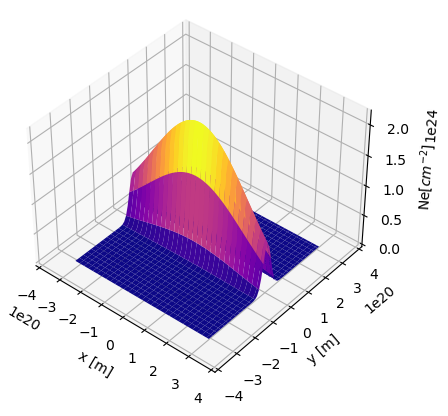

In [15]:
Z = Z.astype(float).reshape(60,60)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('x [m]') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y [m]')
ax.set_zlabel('Ne$[cm^{-2}]$')
ax.set_xlim3d(-4e20, 4e20)
ax.set_ylim3d(-4e20, 4e20)
#ax.set_zlim3d(0, 4e23)
ax.view_init(40, -50)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

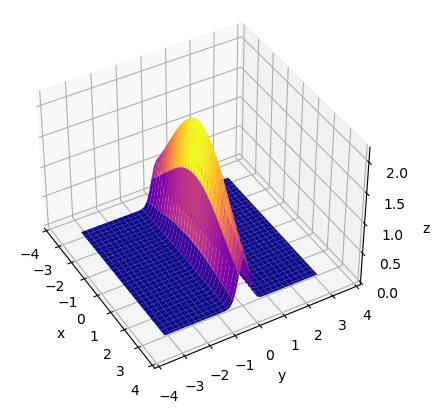

In [16]:
# Use order unity numbers to make the fit easier

X_ = X*1e-20
Y_ = Y*1e-20
Z_ = Z*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

## Do the fitting

We choose to fit with the function
$$
N_e^{fit}(x,y) = Ae^{-\frac{x^2}{B}} e^{-\frac{y^2}{C}}
$$

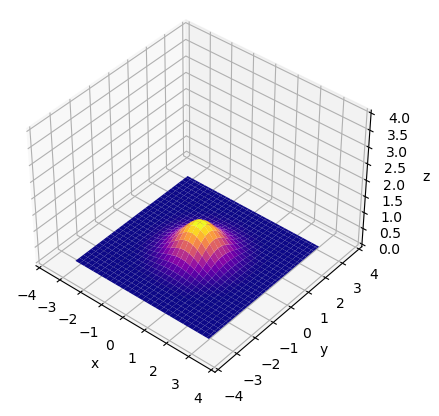

In [17]:
def Ne_fit_plot(x, y, A, B, C):
    'In cm^{-2}'
    'x,y in m'
    return A*np.exp(-x**2/B)*np.exp(-y**2/C)

fig = plt.figure()
ax = fig.gca(projection='3d')
Z1 = Ne_fit_plot(X_ , Y_, 1, 1, 1)
ax.plot_surface(X_, Y_, Z1, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 4)
ax.view_init(40, -50)
plt.show()

In [18]:
def Ne_fit(X, A, B ,C):
    'In cm^{-2}'
    'x,y in m'
    x, y = X
    return A*np.exp(-x**2/B)*np.exp(-y**2/C)

In [19]:
x_data = np.vstack((X_.ravel(), Y_.ravel()))

In [20]:
p0 = [1,1,1]

In [21]:
popt, pcov = curve_fit(Ne_fit, x_data, Z_.ravel(),p0)

In [22]:
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 2.187688444786445 pm 4.278123036621896e-16 %
1 9.52140613691841 pm 1.2289343597866964e-15 %
2 0.09521406136918412 pm 8.1256971893398165e-16 %


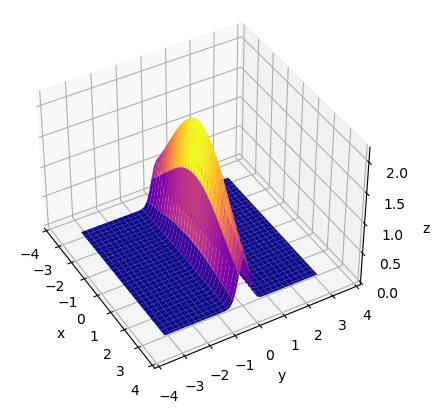

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z1 = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z1, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


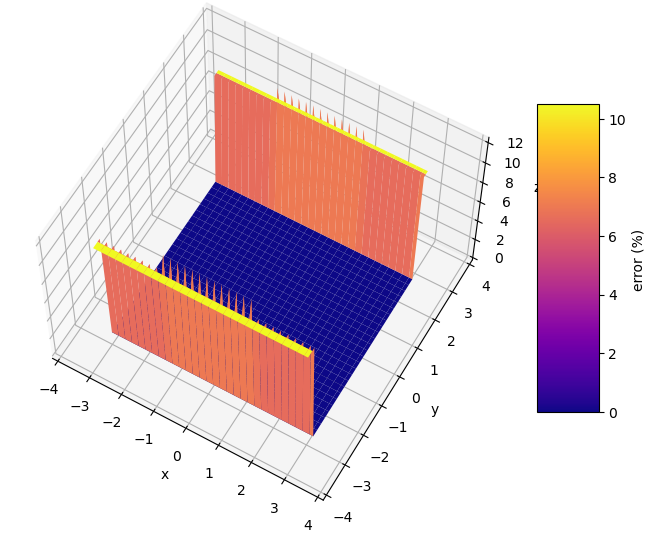

In [24]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z_ - Z1)/Z_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

The plasma term in the lens potential now is given by 

$$
\psi_{plasma} (x,y,w) = \psi_{w}^{2} N_e(x,y) \\
\psi_{w}^{2} = \frac{D_{ls}}{D_s D_l} \frac{2 \pi c^2}{w^2 (1 + z_l)^2} r_e
$$

$$
N_e^{fit}(x,y) = Ae^{-\frac{x^2}{B}} e^{-\frac{y^2}{C}}
$$

$$
\frac{d N_e^{fit}}{dx} = -\frac{2x}{B}N_e^{fit}
$$

$$
\frac{d N_e^{fit}}{dy} = -\frac{2y}{C}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dx^2} = \frac{4x^2}{B^2}N_e^{fit} -\frac{2}{B}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dy^2} = \frac{4y^2}{C^2}N_e^{fit} -\frac{2}{C}N_e^{fit}
$$

$$
\frac{d^2 N_e^{fit}}{dydx} = \frac{4xy}{BC}N_e^{fit} 
$$


$$
x2 = x\_ \; \frac{\pi}{180\cdot3600} \; D_l \; 10^{-20} \\
\frac{dx2}{dx\_} = \frac{\pi}{180\cdot3600} \; D_l \; 10^{-20} \\
\frac{d\psi}{dx\_} = \frac{d\psi}{dx2} \frac{dx2}{dx\_}
$$

In [25]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.314)
import scipy as sp
import multiprocessing as mp

In [26]:
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LensModel.lens_model_extensions import LensModelExtensions
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

In [27]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

In [28]:
#zl = 0.6; zs = 1.
zl = 0.2; zs = 1.2
Dl = cosmo.angular_diameter_distance(zl)   
Ds = cosmo.angular_diameter_distance(zs)    
Dls = cosmo.angular_diameter_distance_z1z2(zl, zs)
G = const.G
rho_crit = (cosmo.critical_density(zl)).to(u.kg/u.m**3)
c_light = (const.c).to(u.cm/u.second)

#r0 = 10*u.kpc
r0 = 10.0*u.kpc
#r0 = 0.1*u.kpc
pi = np.pi

def scale_radius(v,Dl,Ds,Dls):                               #this is e0 in eq 3.42 meneghetti, eq 1 barnacka 2014
    return (4.*pi*v**2/c_light**2*Dl*Dls/Ds).decompose()
def theta_E_SIS():
    'in arcsec'
    pre_theta_E = (scale_radius(v,Dl,Ds,Dls)/Dl).decompose()
    return pre_theta_E*u.rad.to('arcsec', equivalencies=u.dimensionless_angles()) 

v = 180 *u.km/u.s
ss_r = scale_radius(v,Dl,Ds,Dls) 
print('scale radius (m): ',ss_r)
print('scale radius (kpc): ',ss_r.to(u.kpc))
print('theta_E: ',theta_E_SIS() ,'arcsec')
theta_E_num = theta_E_SIS()
elipt = 0.3
re = (const.e.esu**2/const.m_e/(c_light**2)).decompose()
print('Classic electron radius: ',re)

scale radius (m):  7.705329461274929e+19 m
scale radius (kpc):  2.49712721364453 kpc
theta_E:  0.7301786792241515 arcsec
Classic electron radius:  2.817940324670788e-15 m


In [29]:
nu = 130.0 * u.MHz
omega = nu*(1.+zl)*2*np.pi


#diferente al anterior
psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

In [30]:
x_ = .1
y_ = .2
x__ = x_*np.pi/(180.*3600.) #convert arcsec to rad
y__ = y_*np.pi/(180.*3600.) 
x2 = x__*Dl.decompose().value*1e-20
y2 = y__*Dl.decompose().value*1e-20
const = 1e24*1e4 #to leave in m^-2 units

In [31]:
psi0_plasma

<Quantity 2.52986733e-30 m2>

In [32]:
psi0_plasma*const*Ne_fit_plot( x2, y2, popt[0], popt[1], popt[2])*u.m**(-2)

<Quantity 0.03462595>

In [33]:
dl = Dl.decompose().value
const = 1e28
dx2_dx_ = np.pi/(180.*3600.)*dl*1e-20
dy2_dx_ = np.pi/(180.*3600.)*dl*1e-20

A, B, C = popt[0], popt[1], popt[2]

N_e = const*A*np.exp(-x2**2/B)*np.exp(-y2**2/C)

dphiplasma_dx = -2.*x2/B*N_e
dphiplasma_dy = -2.*y2/C*N_e*psi0_plasma

dphi_dx = dphiplasma_dx*dx2_dx_
dphi_dy = dphiplasma_dy*dy2_dx_

dphi_dy

<Quantity -0.16198869 m2>

In [34]:
kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [35]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot0 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


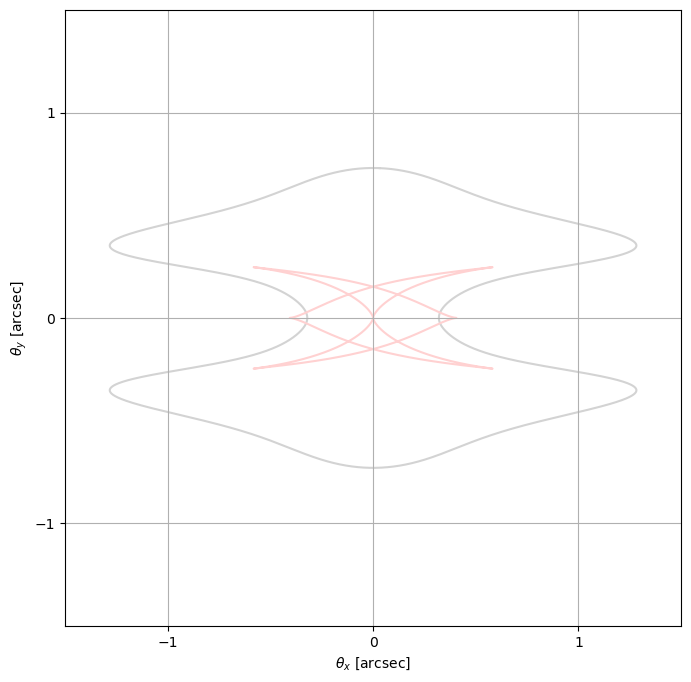

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.plot(SSSpgausscantorot0[0][0],SSSpgausscantorot0[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[2][0],SSSpgausscantorot0[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [37]:
# jet source

radius_3 = 0.5551103128497743

n = 200
t = np.linspace(0,1.3*radius_3*np.sqrt(2)/2,n)
t2 = np.linspace(0,1.3*1.11*radius_3*np.sqrt(2)/2,n)
a = 1.0
b = 0.9

x0 = -0.2*radius_3
y0 = -0.185*radius_3

x1 = 0.01*radius_3
y1 = 0.01*radius_3
x_source_1 = t + x0
y_source_1 = a*t + y0
x_source_2 = t2 + x0 + x1
y_source_2 = b*t2 + y0 - y1
        
mesh_x = []
mesh_y = []
n1 = 7  #n1 lower implies a higher number of points
for j in range(len(x_source_1)):
    for i in range(int(j/n1)):
        mesh_x.append(x_source_1[j]+j*0.02/n)
        z = np.linspace(y_source_2[j]-j*0.02/n, y_source_1[j]+j*0.02/n,int(j/n1))
        mesh_y.append(z[i])
        
mesh__x = []
mesh__y = []
limit = len(mesh_x) - int(n/n1)
for i in range(61):
    mesh_x[i] = 0.
    mesh_y[i] = 0.
for i in range(len(mesh_x)):
    if np.sqrt(mesh_x[i]**2+mesh_y[i]**2) < np.sqrt(mesh_x[limit]**2+mesh_y[limit]**2) and np.sqrt(mesh_x[i]**2+mesh_y[i]**2)>0.001:
        mesh__x.append(mesh_x[i])
        mesh__y.append(mesh_y[i])
        
mesh_x = mesh__x
mesh_y = mesh__y

k = np.array(mesh_y).argmin()
mesh_x[k] = 0
mesh_y[k] = 0

# fig = plt.figure(figsize=(8,8))
# ax = fig.gca()
# ax.set_xticks(np.arange(-2., 2., 0.02))
# ax.set_yticks(np.arange(-2., 2., 0.02))
# ax.set_xlabel(r'$\eta_{x}$ [arcsec]')
# ax.set_ylabel(r'$\eta_{y}$ [arcsec]')
# plt.scatter(mesh_x,mesh_y, s = .5, marker = 'o')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.grid()
# plt.show()

In [38]:
# count blobes from smaller to bigger
alpha = -(np.pi/4 + 1.5* np.pi/180)

rx_1 = 0.017/2
ry_1 = 5*rx_1
cx_1 = 0.12
cy_1 = 0.11+0.01*radius_3
rx_2 = 0.022/2
ry_2 = 5*rx_1
cx_2 = 0.18 
cy_2 = 0.167+0.01*radius_3
rx_3 = 0.027/2
ry_3 = 5*rx_3
cx_3 = 0.26
cy_3 = 0.245+0.01*radius_3 
rx_4 = 0.045/2
ry_4 = 4*rx_4
cx_4 = 0.37 
cy_4 = 0.35+0.01*radius_3   
mesh_light = []
for i in range(len(mesh_x)):
    if ( (mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_1)*np.cos(alpha) + (mesh_y[i]-cy_1)*np.sin(alpha) )**2/rx_1**2 + \
( (mesh_x[i]-cx_1)*np.sin(alpha) - (mesh_y[i]-cy_1)*np.cos(alpha) )**2/ry_1**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_2)*np.cos(alpha) + (mesh_y[i]-cy_2)*np.sin(alpha) )**2/rx_2**2 + \
( (mesh_x[i]-cx_2)*np.sin(alpha) - (mesh_y[i]-cy_2)*np.cos(alpha) )**2/ry_2**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_3)*np.cos(alpha) + (mesh_y[i]-cy_3)*np.sin(alpha) )**2/rx_3**2 + \
( (mesh_x[i]-cx_3)*np.sin(alpha) - (mesh_y[i]-cy_3)*np.cos(alpha) )**2/ry_3**2)
        light = np.exp(-r**2)
        mesh_light.append(light)
    elif ( (mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2 < 1:
        r = np.sqrt(((mesh_x[i]-cx_4)*np.cos(alpha) + (mesh_y[i]-cy_4)*np.sin(alpha) )**2/rx_4**2 + \
( (mesh_x[i]-cx_4)*np.sin(alpha) - (mesh_y[i]-cy_4)*np.cos(alpha) )**2/ry_4**2)
        light = np.exp(-r**2)
        mesh_light.append(light)    
    else:
        light = 1/np.e
        mesh_light.append(light)

In [39]:
def image_position(source):
    x_s, y_s,light = source
    x_pre, y_pre = lensEquationSolver.image_position_from_source(kwargs_lens=kwargs_lens_list, \
                    sourcePos_x=x_s, sourcePos_y=y_s, min_distance=0.05, search_window=5, \
                    precision_limit=10**(-8), num_iter_max=100,non_linear=True)
    light_pre = []
    for k in range(len(x_pre)):
        light_pre = np.append(light_pre,light)
    return x_pre, y_pre, light_pre

def main(x1,x2,x3):
    start_p = time.time()
    x = x1
    y = x2
    l = x3
    
    with mp.Pool(mp.cpu_count()-1) as pool:
        out = pool.map(image_position, zip(x,y,l))
        
        xx = []; yy = []; ll = []
        for i in range(len(out)):
            x = out[i][0]
            xx.append(x)
            y = out[i][1]
            yy.append(y)
            l = out[i][2]
            ll.append(l)
        xx = np.concatenate(xx, axis=0)
        yy = np.concatenate(yy, axis=0)
        ll = np.concatenate(ll, axis=0)
    end_p = time.time()
    pool.close()
    print('time: ',(end_p-start_p)/60.,' minutes')
        
    return xx, yy, ll

In [40]:
x_image_p_gauss_canto_rot_0, y_image_p_gauss_canto_rot_0, light_p_gauss_canto_rot_0 = main(mesh_x,mesh_y,mesh_light)

time:  0.4153352777163188  minutes


In [41]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

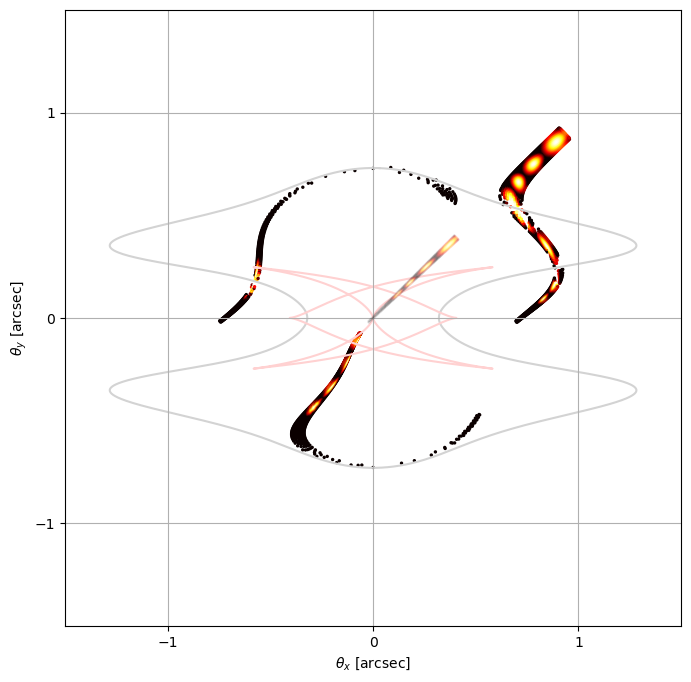

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot0[0][0],SSSpgausscantorot0[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot0[2][0],SSSpgausscantorot0[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_0, y_image_p_gauss_canto_rot_0, c=light_p_gauss_canto_rot_0, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image52.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

#### Perfil de canto que sabemos que anda

In [43]:
lens_model_list = ['PlasmaGaussianSIEcanto']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

In [44]:
A = 2.00744300029693
B = 1.5887225542022732
C = 1.4308204791467736

psi0_plasma = (A*Dls/Ds/Dl*2*pi*c_light**2/omega**2*re*n0*r0 \
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()
z0 = 1.0*u.kpc
thetaz = (z0/Dl).decompose()*u.rad.to('arcsec', equivalencies=u.dimensionless_angles())
print('theta_z: ',thetaz, 'arcsec')

kwargs = {'theta_E':theta_E_num.value,'eta':0*elipt, 'A':A, 'B':B, 'C':C,\
                'thetaz':thetaz.value, 'psi0_plasma':psi0_plasma.value,'theta_0':theta_0.value}
kwargs_lens_list = [kwargs]

theta_z:  0.29240748137875755 arcsec


In [45]:
x_ = .1
y_ = .2
phiplasma = psi0_plasma*np.exp(-(np.abs(x_)/B/theta_0)**C)*np.exp(-(y_)**2/thetaz**2 )
phiplasma

<Quantity 0.03910111>

In [46]:
potencial_plasma = psi0_plasma*np.exp(-(np.abs(x_)/B/theta_0)**C)*np.exp(-(y_)**2/thetaz**2 )


dphiplasma_dx = -potencial_plasma*C/x_*np.abs(x_)**C*(1./B/theta_0)**C
dphiplasma_dy = -2.*potencial_plasma*y_/thetaz**2
dphiplasma_dy

<Quantity -0.18292461>

In [47]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscanto = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)

In [48]:
x_image_p_gauss_canto, y_image_p_gauss_canto, light_p_gauss_canto = main(mesh_x,mesh_y,mesh_light)

time:  0.428247610727946  minutes


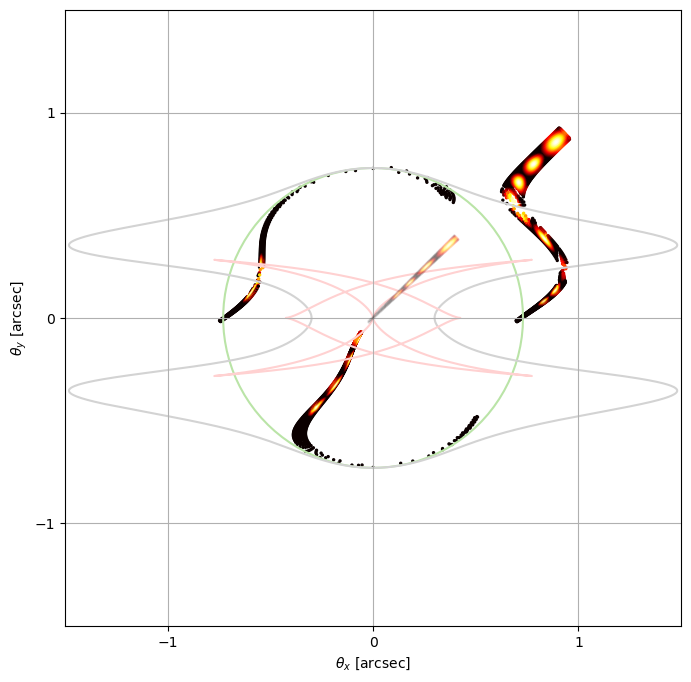

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscanto[0][0],SSSpgausscanto[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscanto[2][0],SSSpgausscanto[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto, y_image_p_gauss_canto, c=light_p_gauss_canto, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

### Let's take $\alpha = 10^o$

In [50]:
alpha = 10.*np.pi/180.
time1 = time.time()
Z2 = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 1.64067426135608e-26
integ_1 = 328083463.342475
integ_0 = 1.7578850618272e-26
integ_1 = 351521952.179329
integ_0 = 1.87906895770923e-26
integ_1 = 375754935.653725
integ_0 = 2.00391405965677e-26
integ_1 = 400720045.665532
integ_0 = 2.13206086459342e-26
integ_1 = 426345392.859763
integ_0 = 2.26310256286389e-26
integ_1 = 452549628.047387
integ_0 = 2.39658593527493e-26
integ_1 = 479242121.585409
integ_0 = 2.53201286474683e-26
integ_1 = 506323265.65983
integ_0 = 2.66884247850065e-26
integ_1 = 533684902.655989
integ_0 = 2.80649392706293e-26
integ_1 = 561210880.872465
integ_0 = 2.94434979603841e-26
integ_1 = 588777736.768759
integ_0 = 3.08176013576442e-26
integ_1 = 616255500.769954
integ_0 = 3.21804708282446e-26
integ_1 = 643508621.424674
integ_0 = 3.35251003618623e-26
integ_1 = 670397000.470569
integ_0 = 3.48443133967914e-26
integ_1 = 696777129.151831
integ_0 = 3.61308241188205e-26
integ_1 = 722503314.004738
integ_0 = 3.7377302545013e-26
integ_1 = 747428978.32941
integ_0 = 3.857644

integ_1 = 26618173795.0744
integ_0 = 2.66188233461807e-20
integ_1 = 26962833580.9459
integ_0 = 2.69004943306759e-20
integ_1 = 27248144760.2101
integ_0 = 2.71216307753051e-20
integ_1 = 27472139077.2269
integ_0 = 2.72806974849335e-20
integ_1 = 27633261496.6593
integ_0 = 2.73765849611937e-20
integ_1 = 27730388181.4596
integ_0 = 2.74086222903786e-20
integ_1 = 27762839547.3204
integ_0 = 2.73765849611937e-20
integ_1 = 27730388181.4596
integ_0 = 2.72806974849335e-20
integ_1 = 27633261496.6593
integ_0 = 2.71216307753051e-20
integ_1 = 27472139077.2269
integ_0 = 2.69004943306759e-20
integ_1 = 27248144760.2101
integ_0 = 2.66188233461807e-20
integ_1 = 26962833580.9459
integ_0 = 2.62785609651107e-20
integ_1 = 26618173795.0743
integ_0 = 2.58820359566236e-20
integ_1 = 26216524267.7651
integ_0 = 2.54319361784686e-20
integ_1 = 25760607593.486
integ_0 = 2.49312782476675e-20
integ_1 = 25253479374.7209
integ_0 = 2.43833738976838e-20
integ_1 = 24698494144.3537
integ_0 = 2.37917935465095e-20
integ_1 = 24099

integ_1 = 491454701377.453
integ_0 = 3.53848784066412e-15
integ_1 = 472848123002.629
integ_0 = 3.39656566284668e-15
integ_1 = 453883062667.469
integ_0 = 3.25271830674397e-15
integ_1 = 434660740761.937
integ_0 = 3.10768523866845e-15
integ_1 = 415279972167.873
integ_0 = 2.96218192596582e-15
integ_1 = 395836364785.238
integ_0 = 2.8168943737348e-15
integ_1 = 376421589473.988
integ_0 = 2.67247424693887e-15
integ_1 = 357122728221.877
integ_0 = 2.52953461720999e-15
integ_1 = 338021705789.847
integ_0 = 2.38864636181058e-15
integ_1 = 319194808505.321
integ_0 = 2.24995178623563e-15
integ_1 = 300712292302.995
integ_0 = 2.11471918689679e-15
integ_1 = 282638080584.302
integ_0 = 1.98297085607077e-15
integ_1 = 265029551009.51
integ_0 = 1.85508617532328e-15
integ_1 = 247937408976.388
integ_0 = 5.8659446470219e-13
integ_1 = 1037761606708.47
integ_0 = 6.28501141962332e-13
integ_1 = 1111899948173.01
integ_0 = 6.71828330185963e-13
integ_1 = 1188551357572.08
integ_0 = 7.16464518777769e-13
integ_1 = 1267518

integ_1 = 28118451321378.2
integ_0 = 5.85573658933524e-8
integ_1 = 29568722585754.3
integ_0 = 6.14337222190514e-8
integ_1 = 31021147587371.8
integ_0 = 6.4300782597581e-8
integ_1 = 32468878571783.7
integ_0 = 6.71444034401298e-8
integ_1 = 33904773690179.7
integ_0 = 6.99499667385852e-8
integ_1 = 35321451534259.8
integ_0 = 7.27024986301638e-8
integ_1 = 36711351005809.7
integ_0 = 7.53867972972348e-8
integ_1 = 38066795900112.0
integ_0 = 7.79875687643268e-8
integ_1 = 39380063477062.9
integ_0 = 8.04895689645263e-8
integ_1 = 40643456198039.0
integ_0 = 8.28777502811976e-8
integ_1 = 41849375722591.1
integ_0 = 8.51374106326167e-8
integ_1 = 42990398189189.6
integ_0 = 8.72543430606683e-8
integ_1 = 44059349750498.6
integ_0 = 8.92149837135374e-8
integ_1 = 45049381297693.3
integ_0 = 9.10065560789316e-8
integ_1 = 45954041291469.7
integ_0 = 9.26172093305883e-8
integ_1 = 46767345620541.1
integ_0 = 9.40361486975459e-8
integ_1 = 47483843432003.2
integ_0 = 9.52537558528601e-8
integ_1 = 48098677921988.4
integ

integ_1 = 653229716791807.0
integ_0 = 0.0023013633160349
integ_1 = 649420902822187.0
integ_0 = 0.0022825991308823
integ_1 = 644125844029160.0
integ_0 = 0.00225869838257263
integ_1 = 637381300289696.0
integ_0 = 0.00222982595347319
integ_1 = 629233799700900.0
integ_0 = 0.00219617944762762
integ_1 = 619739104078181.0
integ_0 = 0.00215798693897712
integ_1 = 608961573526603.0
integ_0 = 0.00211550439781383
integ_1 = 596973440212658.0
integ_0 = 0.00206901283607129
integ_1 = 583854002794810.0
integ_0 = 0.00201881521595181
integ_1 = 569688754070117.0
integ_0 = 0.001965233169394
integ_1 = 554568455241949.0
integ_0 = 0.00190860357795209
integ_1 = 538588170797324.0
integ_0 = 0.00184927506376608
integ_1 = 521846278295032.0
integ_0 = 0.00178760444244973
integ_1 = 504443467407321.0
integ_0 = 0.001723953187931
integ_1 = 486481742334490.0
integ_0 = 0.00165868395759123
integ_1 = 468063441235127.0
integ_0 = 0.00159215722352507
integ_1 = 449290285602536.0
integ_0 = 0.00152472805246292
integ_1 = 4302624715

integ_0 = 11.4396279050783
integ_1 = 3.49930623184595e+15
integ_0 = 10.8024714862654
integ_1 = 3.30440431322471e+15
integ_0 = 10.176969914968
integ_1 = 3.11306753508537e+15
integ_0 = 9.56528654316694
integ_1 = 2.92595765243704e+15
integ_0 = 8.96936319611297
integ_1 = 2.74366865673266e+15
integ_0 = 8.3909158904798
integ_1 = 2.56672546608063e+15
integ_0 = 549.315912491762
integ_1 = 7.09537228397962e+15
integ_0 = 588.559386550693
integ_1 = 7.60227013971758e+15
integ_0 = 629.133096953585
integ_1 = 8.1263503159954e+15
integ_0 = 670.932619693559
integ_1 = 8.66626399478809e+15
integ_0 = 713.83758915928
integ_1 = 9.22045644446818e+15
integ_0 = 757.711800972914
integ_1 = 9.78716834813724e+15
integ_0 = 802.403512329343
integ_1 = 1.03644396830301e+16
integ_0 = 847.745948113839
integ_1 = 1.09501162579068e+16
integ_0 = 893.558018130071
integ_1 = 1.1541858977302e+16
integ_0 = 939.645247541656
integ_1 = 1.2137155859799e+16
integ_0 = 985.800919171452
integ_1 = 1.27333367928162e+16
integ_0 = 1031.80742

integ_0 = 3341117.63538704
integ_1 = 1.26396191241019e+17
integ_0 = 3432213.14684211
integ_1 = 1.2984238109232e+17
integ_0 = 3517554.75233077
integ_1 = 1.33070897734151e+17
integ_0 = 3596595.64134781
integ_1 = 1.36061055045059e+17
integ_0 = 3668820.74404161
integ_1 = 1.38793367668775e+17
integ_0 = 3733752.30848858
integ_1 = 1.41249762005357e+17
integ_0 = 3790955.1563748
integ_1 = 1.4341377503632e+17
integ_0 = 3840041.53632346
integ_1 = 1.45270737928499e+17
integ_0 = 3880675.499214
integ_1 = 1.46807941554614e+17
integ_0 = 3912576.72645938
integ_1 = 1.48014781318956e+17
integ_0 = 3935523.75022808
integ_1 = 1.48882878980039e+17
integ_0 = 3949356.51386543
integ_1 = 1.49406179512645e+17
integ_0 = 3953978.231106
integ_1 = 1.49581021442787e+17
integ_0 = 3949356.51386543
integ_1 = 1.49406179512645e+17
integ_0 = 3935523.75022807
integ_1 = 1.48882878980039e+17
integ_0 = 3912576.72645938
integ_1 = 1.48014781318956e+17
integ_0 = 3880675.499214
integ_1 = 1.46807941554614e+17
integ_0 = 3840041.53632

integ_0 = 3527389493.36528
integ_1 = 7.5531091956177e+17
integ_0 = 3433767874.82012
integ_1 = 7.35263961059678e+17
integ_0 = 3334821411.42544
integ_1 = 7.14076807105007e+17
integ_0 = 3231159235.73789
integ_1 = 6.91879889699201e+17
integ_0 = 3123404796.42035
integ_1 = 6.68806706315037e+17
integ_0 = 3012189681.40893
integ_1 = 6.44992497267115e+17
integ_0 = 2898147546.43722
integ_1 = 6.20572945642241e+17
integ_0 = 2781908228.98079
integ_1 = 5.95682916933365e+17
integ_0 = 2664092121.95347
integ_1 = 5.7045525429351e+17
integ_0 = 2545304874.59743
integ_1 = 5.45019643850869e+17
integ_0 = 2426132480.14645
integ_1 = 5.19501562842675e+17
integ_0 = 2307136801.20492
integ_1 = 4.94021321476003e+17
integ_0 = 2188851574.58359
integ_1 = 4.68693207453445e+17
integ_0 = 2071778927.78041
integ_1 = 4.43624740056024e+17
integ_0 = 1956386429.60215
integ_1 = 4.18916038600319e+17
integ_0 = 1843104687.79548
integ_1 = 3.94659308025344e+17
integ_0 = 1732325497.18837
integ_1 = 3.70938442358782e+17
integ_0 = 162440

integ_0 = 10770892736661.1
integ_1 = 3.35129941928737e+18
integ_0 = 11459672519340.4
integ_1 = 3.56560916520594e+18
integ_0 = 12164012143736.8
integ_1 = 3.78476026362754e+18
integ_0 = 12881475589556.1
integ_1 = 4.00799476127973e+18
integ_0 = 13609385513620.9
integ_1 = 4.23447961870559e+18
integ_0 = 14344834763971.3
integ_1 = 4.46331029280797e+18
integ_0 = 15084701316813.5
integ_1 = 4.69351538439251e+18
integ_0 = 15825666614551.1
integ_1 = 4.92406234393727e+18
integ_0 = 16564237224884.8
integ_1 = 5.15386421069335e+18
integ_0 = 17296769681113.1
integ_1 = 5.38178734159697e+18
integ_0 = 18019498303498.4
integ_1 = 5.60666006772283e+18
integ_0 = 18728565742171.9
integ_1 = 5.82728219752771e+18
integ_0 = 19420055924835.4
integ_1 = 6.04243526833263e+18
integ_0 = 20090029038821.1
integ_1 = 6.2508934307834e+18
integ_0 = 20734558128182.1
integ_1 = 6.45143483581819e+18
integ_0 = 21349766843649.1
integ_1 = 6.64285338034306e+18
integ_0 = 21931867847657.4
integ_1 = 6.82397065672811e+18
integ_0 = 22477

integ_0 = 2.63026740208497e+15
integ_1 = 2.3591797954911e+19
integ_0 = 2.67681843012541e+15
integ_1 = 2.40093305781162e+19
integ_0 = 2.71782855206879e+15
integ_1 = 2.43771648561928e+19
integ_0 = 2.75301977946114e+15
integ_1 = 2.46928074124468e+19
integ_0 = 2.78215126215407e+15
integ_1 = 2.49540979767726e+19
integ_0 = 2.8050220328905e+15
integ_1 = 2.51592340028128e+19
integ_0 = 2.82147331596059e+15
integ_1 = 2.53067913751093e+19
integ_0 = 2.83139036283054e+15
integ_1 = 2.53957408735062e+19
integ_0 = 2.83470378505736e+15
integ_1 = 2.54254601285342e+19
integ_0 = 2.83139036283053e+15
integ_1 = 2.53957408735062e+19
integ_0 = 2.82147331596059e+15
integ_1 = 2.53067913751093e+19
integ_0 = 2.80502203289049e+15
integ_1 = 2.51592340028128e+19
integ_0 = 2.78215126215407e+15
integ_1 = 2.49540979767726e+19
integ_0 = 2.75301977946114e+15
integ_1 = 2.46928074124468e+19
integ_0 = 2.71782855206879e+15
integ_1 = 2.43771648561928e+19
integ_0 = 2.67681843012541e+15
integ_1 = 2.40093305781161e+19
integ_0 = 

integ_1 = 6.30354143990948e+19
integ_0 = 1.27515490992601e+17
integ_1 = 6.22296469947198e+19
integ_0 = 1.25591371889763e+17
integ_1 = 6.1290645375282e+19
integ_0 = 1.23407283716773e+17
integ_1 = 6.02247745939948e+19
integ_0 = 1.20977864466982e+17
integ_1 = 5.90391782312326e+19
integ_0 = 1.18319184172505e+17
integ_1 = 5.77416987257291e+19
integ_0 = 1.15448568120061e+17
integ_1 = 5.63407911010131e+19
integ_0 = 1.12384409249471e+17
integ_1 = 5.48454314128036e+19
integ_0 = 1.09145972569613e+17
integ_1 = 5.32650213007962e+19
integ_0 = 1.05753194490003e+17
integ_1 = 5.1609290059187e+19
integ_0 = 1.02226479974583e+17
integ_1 = 4.98881956444037e+19
integ_0 = 9.85865003790418e+16
integ_1 = 4.81118260164057e+19
integ_0 = 9.48539947363836e+16
integ_1 = 4.62903021627909e+19
integ_0 = 9.10495771111571e+16
integ_1 = 4.44336840845053e+19
integ_0 = 8.71935524551424e+16
integ_1 = 4.25518809304034e+19
integ_0 = 8.3305743171826e+16
integ_1 = 4.06545663578734e+19
integ_0 = 7.9405328339644e+16
integ_1 = 3.

integ_1 = 8.8237956883283e+19
integ_0 = 1.73702776947879e+18
integ_1 = 8.45010066619447e+19
integ_0 = 1.65957671378253e+18
integ_1 = 8.07332533258376e+19
integ_0 = 1.58187453644009e+18
integ_1 = 7.69532837014997e+19
integ_0 = 1.50428758024359e+18
integ_1 = 7.31789192280939e+19
integ_0 = 1.42716384954854e+18
integ_1 = 6.9427089236791e+19
integ_0 = 1.35083073896737e+18
integ_1 = 6.57137204587653e+19
integ_0 = 1.2755931103308e+18
integ_1 = 6.20536434753351e+19
integ_0 = 1.20173172630747e+18
integ_1 = 5.8460516518425e+19
integ_0 = 1.1295020429646e+18
integ_1 = 5.49467667323885e+19
integ_0 = 1.05913335772866e+18
integ_1 = 5.15235487249416e+19
integ_0 = 9.90828303770104e+17
integ_1 = 4.82007199705527e+19
integ_0 = 3.01549550582364e+18
integ_1 = 5.67749149026914e+19
integ_0 = 3.23092440013842e+18
integ_1 = 6.0830950509006e+19
integ_0 = 3.45365568935143e+18
integ_1 = 6.50244735856658e+19
integ_0 = 3.68311613297158e+18
integ_1 = 6.93446913193379e+19
integ_0 = 3.91864497832124e+18
integ_1 = 7.37

integ_0 = 2.00629784256352e+19
integ_1 = 7.73232228069504e+19
integ_0 = 2.13959601539765e+19
integ_1 = 8.24605678706543e+19
integ_0 = 2.27641944447991e+19
integ_1 = 8.77337771956567e+19
integ_0 = 2.41633377569552e+19
integ_1 = 9.31261106652712e+19
integ_0 = 2.55885510307292e+19
integ_1 = 9.86189184218022e+19
integ_0 = 2.70345158278684e+19
integ_1 = 1.04191703070633e+20
integ_0 = 2.84954572038984e+19
integ_1 = 1.098222078307e+20
integ_0 = 2.99651733797907e+19
integ_1 = 1.15486530889847e+20
integ_0 = 3.143707216975e+19
integ_1 = 1.21159265798433e+20
integ_0 = 3.29042140061747e+19
integ_1 = 1.26813667288609e+20
integ_0 = 3.43593612839493e+19
integ_1 = 1.32421841448459e+20
integ_0 = 3.57950336265083e+19
integ_1 = 1.37954958718806e+20
integ_0 = 3.72035685581303e+19
integ_1 = 1.43383487725746e+20
integ_0 = 3.85771869532681e+19
integ_1 = 1.48677447524021e+20
integ_0 = 3.99080625270526e+19
integ_1 = 1.53806675415159e+20
integ_0 = 4.11883945339907e+19
integ_1 = 1.58741107130086e+20
integ_0 = 4.

integ_1 = 1.08921725760543e+20
integ_0 = 1.12416156783044e+20
integ_1 = 1.12416156783037e+20
integ_0 = 1.15751622095818e+20
integ_1 = 1.1575162209581e+20
integ_0 = 1.18907587963314e+20
integ_1 = 1.18907587963306e+20
integ_0 = 1.21864212166829e+20
integ_1 = 1.21864212166821e+20
integ_0 = 1.24602550685268e+20
integ_1 = 1.2460255068526e+20
integ_0 = 1.27104759139199e+20
integ_1 = 1.27104759139191e+20
integ_0 = 1.29354286013187e+20
integ_1 = 1.29354286013178e+20
integ_0 = 1.31336054736682e+20
integ_1 = 1.31336054736674e+20
integ_0 = 1.33036631825526e+20
integ_1 = 1.33036631825517e+20
integ_0 = 1.34444378463041e+20
integ_1 = 1.34444378463033e+20
integ_0 = 1.35549583129106e+20
integ_1 = 1.35549583129097e+20
integ_0 = 1.36344573163388e+20
integ_1 = 1.36344573163379e+20
integ_0 = 1.36823803470078e+20
integ_1 = 1.36823803470069e+20
integ_0 = 1.36983920929516e+20
integ_1 = 1.36983920929508e+20
integ_0 = 1.36823803470078e+20
integ_1 = 1.36823803470069e+20
integ_0 = 1.36344573163388e+20
integ_1 = 

integ_0 = 1.93206765519086e+20
integ_1 = 5.01311640624964e+19
integ_0 = 1.92530051854168e+20
integ_1 = 4.99555778522094e+19
integ_0 = 1.91407458787406e+20
integ_1 = 4.96642997644359e+19
integ_0 = 1.89846816462376e+20
integ_1 = 4.92593614786117e+19
integ_0 = 1.87858959323437e+20
integ_1 = 4.87435741970576e+19
integ_0 = 1.85457600857159e+20
integ_1 = 4.81204961442656e+19
integ_0 = 1.82659176055606e+20
integ_1 = 4.73943916910064e+19
integ_0 = 1.79482654132895e+20
integ_1 = 4.65701827600836e+19
integ_0 = 1.75949324479884e+20
integ_1 = 4.56533932882135e+19
integ_0 = 1.72082559234174e+20
integ_1 = 4.46500876203035e+19
integ_0 = 1.67907556166514e+20
integ_1 = 4.35668037964479e+19
integ_0 = 1.63451065834545e+20
integ_1 = 4.24104827567853e+19
integ_0 = 1.58741107126789e+20
integ_1 = 4.11883945339858e+19
integ_0 = 1.53806675411965e+20
integ_1 = 3.99080625270478e+19
integ_0 = 1.48677447520933e+20
integ_1 = 3.85771869532635e+19
integ_0 = 1.43383487722769e+20
integ_1 = 3.72035685581258e+19
integ_0 

integ_1 = 6.40424933372737e+18
integ_0 = 1.16012347239242e+20
integ_1 = 6.1617831067772e+18
integ_0 = 1.11359307377215e+20
integ_1 = 5.91464542618298e+18
integ_0 = 1.0664314890018e+20
integ_1 = 5.66415531608502e+18
integ_0 = 1.01888115843011e+20
integ_1 = 5.41160045394255e+18
integ_0 = 9.71176654139511e+19
integ_1 = 5.15822672636096e+18
integ_0 = 9.23542888763053e+19
integ_1 = 4.90522871555132e+18
integ_0 = 8.76193516227014e+19
integ_1 = 4.65374120516813e+18
integ_0 = 8.2932953730419e+19
integ_1 = 4.40483177396119e+18
integ_0 = 7.83138118982798e+19
integ_1 = 4.15949452507001e+18
integ_0 = 7.37791632802347e+19
integ_1 = 3.91864497832117e+18
integ_0 = 6.93446913557833e+19
integ_1 = 3.68311613297151e+18
integ_0 = 6.50244736198407e+19
integ_1 = 3.45365568935137e+18
integ_0 = 6.08309505409769e+19
integ_1 = 3.23092440013836e+18
integ_0 = 4.49868324596843e+19
integ_1 = 9.24762676877714e+17
integ_0 = 4.82007200469142e+19
integ_1 = 9.90828303770076e+17
integ_0 = 5.15235488065672e+19
integ_1 = 1

integ_0 = 2.26538640635888e+19
integ_1 = 4.64202958592241e+16
integ_0 = 2.42722703512955e+19
integ_1 = 4.97365909727152e+16
integ_0 = 2.59455357694647e+19
integ_1 = 5.316529856734e+16
integ_0 = 2.76693538576372e+19
integ_1 = 5.66975942249741e+16
integ_0 = 2.94387607213851e+19
integ_1 = 6.03233063719157e+16
integ_0 = 3.12481392733637e+19
integ_1 = 6.40309249692738e+16
integ_0 = 3.30912316193421e+19
integ_1 = 6.78076268933266e+16
integ_0 = 3.49611599305657e+19
integ_1 = 7.16393187053233e+16
integ_0 = 3.68504560223386e+19
integ_1 = 7.55106972612992e+16
integ_0 = 3.87510997255612e+19
integ_1 = 7.94053283396404e+16
integ_0 = 4.06545659953113e+19
integ_1 = 8.33057431718221e+16
integ_0 = 4.25518805509208e+19
integ_1 = 8.71935524551383e+16
integ_0 = 4.44336836882405e+19
integ_1 = 9.10495771111528e+16
integ_0 = 4.62903017499687e+19
integ_1 = 9.48539947363792e+16
integ_0 = 4.81118255873388e+19
integ_1 = 9.85865003790372e+16
integ_0 = 4.9888195199495e+19
integ_1 = 1.02226479974578e+17
integ_0 = 5

integ_1 = 2.02169080137305e+15
integ_0 = 1.8846803516339e+19
integ_1 = 2.10124435465045e+15
integ_0 = 1.95426592367154e+19
integ_1 = 2.17882583433345e+15
integ_0 = 2.02168620461749e+19
integ_1 = 2.2539932146289e+15
integ_0 = 2.08654601969878e+19
integ_1 = 2.32630591219858e+15
integ_0 = 2.14845528675941e+19
integ_1 = 2.39532902150139e+15
integ_0 = 2.20703288100895e+19
integ_1 = 2.46063762363074e+15
integ_0 = 2.2619105128381e+19
integ_1 = 2.52182110972037e+15
integ_0 = 2.31273656400141e+19
integ_1 = 2.57848745793347e+15
integ_0 = 2.35917982660185e+19
integ_1 = 2.63026740208481e+15
integ_0 = 2.40093308947297e+19
integ_1 = 2.67681843012525e+15
integ_0 = 2.4377165177657e+19
integ_1 = 2.71782855206862e+15
integ_0 = 2.46928077380734e+19
integ_1 = 2.75301977946097e+15
integ_0 = 2.49540983058449e+19
integ_1 = 2.7821512621539e+15
integ_0 = 2.51592343345903e+19
integ_1 = 2.80502203289032e+15
integ_0 = 2.53067917088326e+19
integ_1 = 2.82147331596042e+15
integ_0 = 2.53957412084025e+19
integ_1 = 2.8

integ_1 = 25148026392454.1
integ_0 = 7.77903732759234e+18
integ_1 = 25001394737816.0
integ_0 = 7.71561088131729e+18
integ_1 = 24797545655550.4
integ_0 = 7.63482189334528e+18
integ_1 = 24537894326768.1
integ_0 = 7.53722769683667e+18
integ_1 = 24224231989350.4
integ_0 = 7.42349623032199e+18
integ_1 = 23858705360707.3
integ_0 = 7.29439842626971e+18
integ_1 = 23443792175055.4
integ_0 = 7.15079951201846e+18
integ_1 = 22982273225097.0
integ_0 = 6.99364936032648e+18
integ_1 = 22477201349220.7
integ_0 = 6.82397203995512e+18
integ_1 = 21931867847655.9
integ_0 = 6.64285472685737e+18
integ_1 = 21349766843647.6
integ_0 = 6.45143614353174e+18
integ_1 = 20734558128180.7
integ_0 = 6.25089469784696e+18
integ_1 = 20090029038819.8
integ_0 = 6.04243649314148e+18
integ_1 = 19420055924834.0
integ_0 = 5.82728337872477e+18
integ_1 = 18728565742170.6
integ_0 = 5.60666120419952e+18
integ_1 = 18019498303497.1
integ_0 = 5.38178843249169e+18
integ_1 = 17296769681111.9
integ_0 = 5.15386525538778e+18
integ_1 = 1656

integ_0 = 9.25247135693796e+17
integ_1 = 44905275176.5209
integ_0 = 8.71672031334507e+17
integ_1 = 42305099816.8202
integ_0 = 8.19280475528969e+17
integ_1 = 39762365946.4693
integ_0 = 7.68238788387671e+17
integ_1 = 37285145625.3978
integ_0 = 7.18693949193477e+17
integ_1 = 34880572239.798
integ_0 = 3.03695325018234e+17
integ_1 = 1418315242.52811
integ_0 = 3.25391509924129e+17
integ_1 = 1519640574.93121
integ_0 = 3.47823130577731e+17
integ_1 = 1624400532.91114
integ_0 = 3.70932455021912e+17
integ_1 = 1732325497.18822
integ_0 = 3.94652937808736e+17
integ_1 = 1843104687.79531
integ_0 = 4.18909276854549e+17
integ_1 = 1956386429.60198
integ_0 = 4.43617579485807e+17
integ_1 = 2071778927.78023
integ_0 = 4.6868564225178e+17
integ_1 = 2188851574.58339
integ_0 = 4.9401334745192e+17
integ_1 = 2307136801.20471
integ_0 = 5.19493177540679e+17
integ_1 = 2426132480.14623
integ_0 = 5.45010846660187e+17
integ_1 = 2545304874.5972
integ_0 = 5.70446046545304e+17
integ_1 = 2664092121.95323
integ_0 = 5.956733

integ_0 = 1.2640387716609e+17
integ_1 = 3341117.63538669
integ_0 = 1.29850276573998e+17
integ_1 = 3432213.14684174
integ_0 = 1.33078989536119e+17
integ_1 = 3517554.7523304
integ_0 = 1.36069328673116e+17
integ_1 = 3596595.64134743
integ_0 = 1.38801807443849e+17
integ_1 = 3668820.74404122
integ_0 = 1.41258351149352e+17
integ_1 = 3733752.30848818
integ_0 = 1.43422495770055e+17
integ_1 = 3790955.15637439
integ_0 = 1.45279571580809e+17
integ_1 = 3840041.53632306
integ_0 = 1.46816868681512e+17
integ_1 = 3880675.49921359
integ_0 = 1.48023781831609e+17
integ_1 = 3912576.72645896
integ_0 = 1.48891932280149e+17
integ_1 = 3935523.75022766
integ_0 = 1.4941526463372e+17
integ_1 = 3949356.51386501
integ_0 = 1.49590117195685e+17
integ_1 = 3953978.23110558
integ_0 = 1.4941526463372e+17
integ_1 = 3949356.51386501
integ_0 = 1.48891932280149e+17
integ_1 = 3935523.75022766
integ_0 = 1.48023781831609e+17
integ_1 = 3912576.72645896
integ_0 = 1.46816868681511e+17
integ_1 = 3880675.49921359
integ_0 = 1.452795

integ_0 = 1.80817134395418e+16
integ_1 = 1400.13348506211
integ_0 = 1.76430216312924e+16
integ_1 = 1366.1639670512
integ_0 = 1.71747523221458e+16
integ_1 = 1329.90415450881
integ_0 = 1.66798496193693e+16
integ_1 = 1291.58202047422
integ_0 = 1.61613602346721e+16
integ_1 = 1251.43348302554
integ_0 = 1.56224024849473e+16
integ_1 = 1209.70000489325
integ_0 = 1.50661353974697e+16
integ_1 = 1166.62620116224
integ_0 = 1.44957283420626e+16
integ_1 = 1122.45748777887
integ_0 = 1.39143315906837e+16
integ_1 = 1077.43780187169
integ_0 = 1.33250481762189e+16
integ_1 = 1031.80742267435
integ_0 = 1.27309073878069e+16
integ_1 = 985.800919171332
integ_0 = 1.21348402006969e+16
integ_1 = 939.645247541541
integ_0 = 1.15396568954382e+16
integ_1 = 893.558018129962
integ_0 = 1.09480270751794e+16
integ_1 = 847.745948113736
integ_0 = 1.03624622420738e+16
integ_1 = 802.403512329244
integ_0 = 9.78530104530854e+15
integ_1 = 757.711800972821
integ_0 = 9.21869726512353e+15
integ_1 = 713.837589159192
integ_0 = 8.664

integ_1 = 0.000869729164079854
integ_0 = 262456908198616.0
integ_1 = 0.000929685967146295
integ_0 = 279894511713093.0
integ_1 = 0.000991454184257966
integ_0 = 297793276993216.0
integ_1 = 0.00105485594809183
integ_0 = 316096383343870.0
integ_1 = 0.00111968998597706
integ_0 = 334740527868313.0
integ_1 = 0.0011857320637139
integ_0 = 353656136606461.0
integ_1 = 0.00125273573347662
integ_0 = 372767663742547.0
integ_1 = 0.0013204333936796
integ_0 = 391993979759582.0
integ_1 = 0.00138853766391444
integ_0 = 411248847974980.0
integ_1 = 0.00145674307295461
integ_0 = 430441487378155.0
integ_1 = 0.00152472805246267
integ_0 = 449477218135376.0
integ_1 = 0.00159215722352481
integ_0 = 468258184561221.0
integ_1 = 0.00165868395759096
integ_0 = 486684148812416.0
integ_1 = 0.00172395318793071
integ_0 = 504653347073227.0
integ_1 = 0.00178760444244943
integ_0 = 522063398606066.0
integ_1 = 0.00184927506376577
integ_0 = 538812256770583.0
integ_1 = 0.00190860357795177
integ_0 = 554799190001398.0
integ_1 = 0.0

integ_0 = 47410733115237.7
integ_1 = 9.40361486975332e-8
integ_0 = 48024620951770.4
integ_1 = 9.52537558528472e-8
integ_0 = 48532800524081.7
integ_1 = 9.62616974451182e-8
integ_0 = 48931766090434.0
integ_1 = 9.70530200604322e-8
integ_0 = 49218747912906.1
integ_1 = 9.76222301012448e-8
integ_0 = 49391744278730.7
integ_1 = 9.79653572986512e-8
integ_0 = 49449544752117.6
integ_1 = 9.80800008308865e-8
integ_0 = 49391744278730.7
integ_1 = 9.79653572986512e-8
integ_0 = 49218747912906.1
integ_1 = 9.76222301012447e-8
integ_0 = 48931766090434.0
integ_1 = 9.70530200604321e-8
integ_0 = 48532800524081.7
integ_1 = 9.62616974451182e-8
integ_0 = 48024620951770.4
integ_1 = 9.52537558528471e-8
integ_0 = 47410733115237.7
integ_1 = 9.40361486975331e-8
integ_0 = 46695338487051.6
integ_1 = 9.26172093305757e-8
integ_0 = 45883286393116.0
integ_1 = 9.10065560789192e-8
integ_0 = 44980019293720.6
integ_1 = 8.92149837135252e-8
integ_0 = 43991512086486.5
integ_1 = 8.72543430606564e-8
integ_0 = 42924206377358.0
inte

integ_1 = 1.19863148815936e-12
integ_0 = 2042510543634.61
integ_1 = 1.15055660451974e-12
integ_0 = 1956008538174.34
integ_1 = 1.10182958374783e-12
integ_0 = 1868793509782.5
integ_1 = 1.05270091352269e-12
integ_0 = 1781295701752.55
integ_1 = 1.00341295208543e-12
integ_0 = 1693927640379.04
integ_1 = 9.54198077601354e-13
integ_0 = 1607081201659.96
integ_1 = 9.05277035818409e-13
integ_0 = 1521125053654.93
integ_1 = 8.56857499334509e-13
integ_0 = 1436402491016.05
integ_1 = 8.09132847777735e-13
integ_0 = 1353229671139.75
integ_1 = 7.62281174221659e-13
integ_0 = 1271894254509.84
integ_1 = 7.16464519283674e-13
integ_0 = 1192654445244.78
integ_1 = 6.7182833066035e-13
integ_0 = 1115738421741.32
integ_1 = 6.28501142406125e-13
integ_0 = 232020360999.832
integ_1 = 1.73162831874009e-15
integ_0 = 248596041425.214
integ_1 = 1.85533693423956e-15
integ_0 = 265733587818.289
integ_1 = 1.98323890163626e-15
integ_0 = 283388893508.883
integ_1 = 2.11500504137547e-15
integ_0 = 301511118403.055
integ_1 = 2.2502

integ_0 = 20390964141.6807
integ_1 = 2.35757445506589e-20
integ_0 = 21143832872.4275
integ_1 = 2.44462007366899e-20
integ_0 = 21873274620.9972
integ_1 = 2.52895709770267e-20
integ_0 = 22575013864.1596
integ_1 = 2.61009119721369e-20
integ_0 = 23244830177.3485
integ_1 = 2.68753441267856e-20
integ_0 = 23878600048.6229
integ_1 = 2.76080998947449e-20
integ_0 = 24472338834.0029
integ_1 = 2.82945722869612e-20
integ_0 = 25022242262.3671
integ_1 = 2.89303628589307e-20
integ_0 = 25524726888.7321
integ_1 = 2.95113284822088e-20
integ_0 = 25976468896.4763
integ_1 = 3.00336262069942e-20
integ_0 = 26374440662.1791
integ_1 = 3.04937555378779e-20
integ_0 = 26715944521.2001
integ_1 = 3.08885974731292e-20
integ_0 = 26998643207.6574
integ_1 = 3.12154496989688e-20
integ_0 = 27220586488.5266
integ_1 = 3.14720573835369e-20
integ_0 = 27380233567.3752
integ_1 = 3.16566390797745e-20
integ_0 = 27476470897.7308
integ_1 = 3.17679073209885e-20
integ_0 = 27508625117.9974
integ_1 = 3.18050835760181e-20
integ_0 = 2747

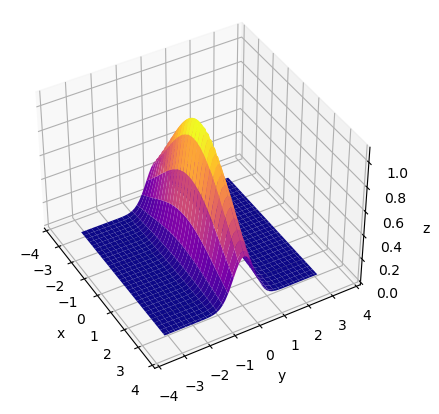

In [51]:
Z2 = Z2.astype(float).reshape(60,60)

X_ = X*1e-20
Y_ = Y*1e-20
Z2_ = Z2*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z2_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

Do the fit

In [52]:
popt, pcov = curve_fit(Ne_fit, x_data, Z2_.ravel(),p0)
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 1.095871367445642 pm 1.2362637142301844e-07 %
1 9.52140613691841 pm 3.5512933126132897e-07 %
2 0.37944853137969886 pm 2.3481102504691835e-07 %


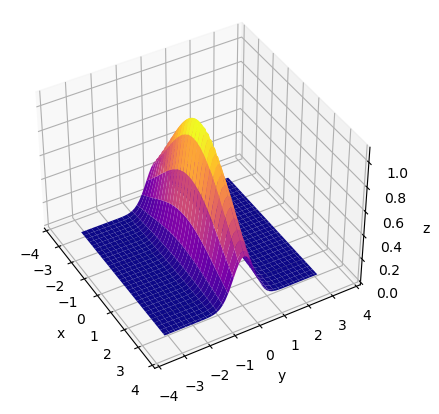

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z2fit = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z2fit, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


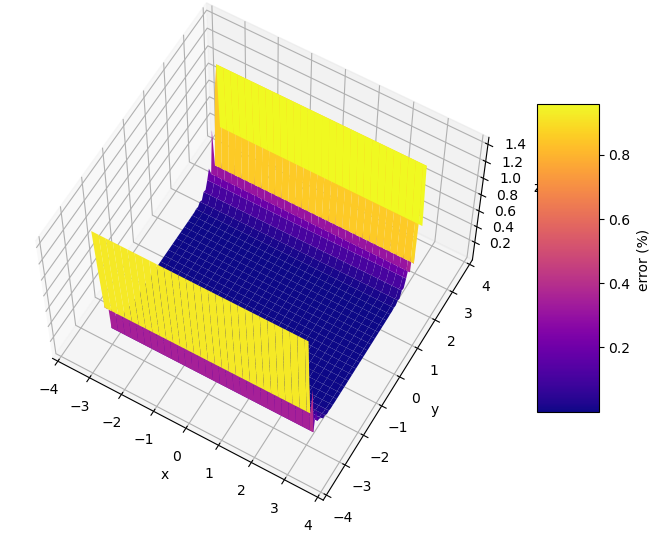

In [54]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z2_ - Z2fit)/Z2_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

In [55]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [56]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot2 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


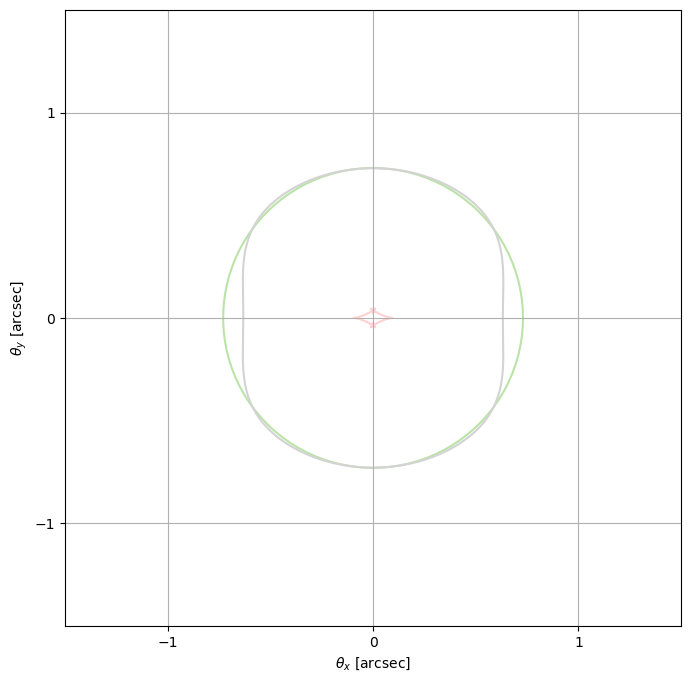

In [57]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))
plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot2[0][0],SSSpgausscantorot2[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot2[2][0],SSSpgausscantorot2[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [58]:
x_image_p_gauss_canto_rot_2, y_image_p_gauss_canto_rot_2, light_p_gauss_canto_rot_2 = main(mesh_x,mesh_y,mesh_light)

time:  0.2173245867093404  minutes


In [59]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

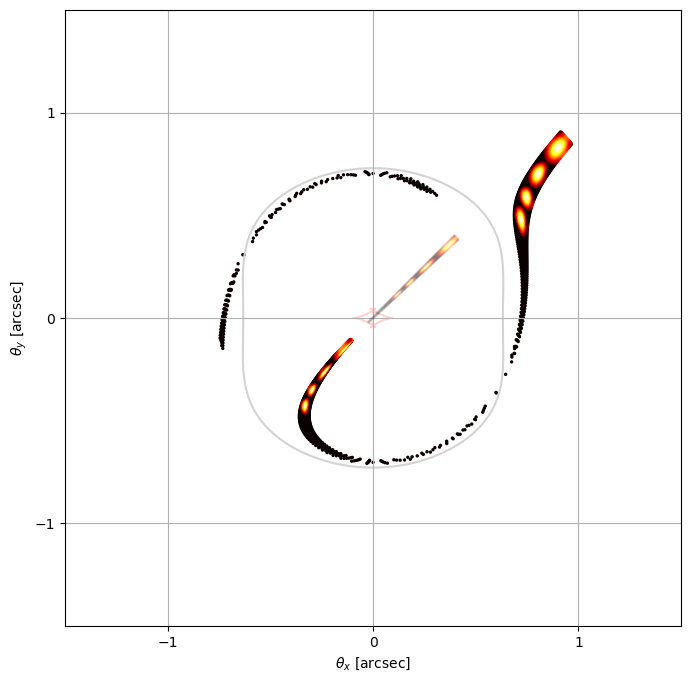

In [60]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot2[0][0],SSSpgausscantorot2[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot2[2][0],SSSpgausscantorot2[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_2, y_image_p_gauss_canto_rot_2, c=light_p_gauss_canto_rot_2, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image53.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### Let's take $\alpha = 5^o$

In [61]:
alpha = 5.*np.pi/180.
time1 = time.time()
Z3 = f(X, Y)
time2 = time.time()
print('time: ',(time2-time1)/60.,'minutes')

integ_0 = 3.75420830283107e-27
integ_1 = 4.33707443902879e-20
integ_0 = 4.02241130367931e-27
integ_1 = 4.64691776300537e-20
integ_0 = 4.29970558372346e-27
integ_1 = 4.9672638485333e-20
integ_0 = 4.58537747444471e-27
integ_1 = 5.29728822524725e-20
integ_0 = 4.87860435707818e-27
integ_1 = 5.636040557276e-20
integ_0 = 5.17845536544194e-27
integ_1 = 5.98244545519037e-20
integ_0 = 5.48389343855538e-27
integ_1 = 6.33530484730442e-20
integ_0 = 5.79377877961638e-27
integ_1 = 6.69330197568216e-20
integ_0 = 6.10687375777686e-27
integ_1 = 7.05500705894674e-20
integ_0 = 6.421849267091e-27
integ_1 = 7.41888463849827e-20
integ_0 = 6.73729253336981e-27
integ_1 = 7.78330259743515e-20
integ_0 = 7.05171633487924e-27
integ_1 = 8.14654281282768e-20
integ_0 = 7.36356957733664e-27
integ_1 = 8.50681337255403e-20
integ_0 = 7.67124913800501e-27
integ_1 = 8.86226225826984e-20
integ_0 = 7.9731128683984e-27
integ_1 = 9.21099236687138e-20
integ_0 = 8.26749362075633e-27
integ_1 = 9.55107771467449e-20
integ_0 = 8.55

integ_1 = 0.005498396688396
integ_0 = 5.97161466220377e-21
integ_1 = 0.00571475865314032
integ_0 = 6.19209673063388e-21
integ_1 = 0.00592575716521749
integ_0 = 6.40571806853222e-21
integ_1 = 0.00613019004615617
integ_0 = 6.61122656358894e-21
integ_1 = 0.00632685904053261
integ_0 = 6.80738623946449e-21
integ_1 = 0.00651458133483974
integ_0 = 6.99298950125577e-21
integ_1 = 0.00669220127624121
integ_0 = 7.16686942236488e-21
integ_1 = 0.00685860213094722
integ_0 = 7.32791189945421e-21
integ_1 = 0.00701271771635068
integ_0 = 7.47506749942899e-21
integ_1 = 0.00715354373843757
integ_0 = 7.6073628228985e-21
integ_1 = 0.00728014866647363
integ_0 = 7.7239112124058e-21
integ_1 = 0.00739168398064285
integ_0 = 7.82392264087769e-21
integ_1 = 0.0074873936351673
integ_0 = 7.90671262615276e-21
integ_1 = 0.00756662258939614
integ_0 = 7.97171003093497e-21
integ_1 = 0.00762882427226121
integ_0 = 8.01846362386004e-21
integ_1 = 0.00767356686113338
integ_0 = 8.046647296246e-21
integ_1 = 0.00770053827418592
i

integ_1 = 10.3110411151227
integ_0 = 1.63117519565593e-15
integ_1 = 10.2269699546709
integ_0 = 1.61409540828859e-15
integ_1 = 10.1198849078266
integ_0 = 1.59346279279857e-15
integ_1 = 9.99052471447364
integ_0 = 1.56941855962015e-15
integ_1 = 9.83977472087783
integ_0 = 1.54212569337496e-15
integ_1 = 9.66865679080523
integ_0 = 1.51176711378188e-15
integ_1 = 9.478317774989
integ_0 = 1.4785436356443e-15
integ_1 = 9.27001672087319
integ_0 = 1.44267175971477e-15
integ_1 = 9.04511102200898
integ_0 = 1.40438132838363e-15
integ_1 = 8.80504171993899
integ_0 = 1.36391308161597e-15
integ_1 = 8.55131818066913
integ_0 = 1.32151614935308e-15
integ_1 = 8.2855023727918
integ_0 = 1.27744551669975e-15
integ_1 = 8.00919297498509
integ_0 = 1.23195949765304e-15
integ_1 = 7.72400953706425
integ_0 = 1.18531725192125e-15
integ_1 = 7.43157691119565
integ_0 = 1.13777637757825e-15
integ_1 = 7.13351015857491
integ_0 = 1.0895906099539e-15
integ_1 = 6.83140012217337
integ_0 = 1.04100765434406e-15
integ_1 = 6.5267998

integ_0 = 8.41820810925928e-11
integ_1 = 3522.52522076296
integ_0 = 7.89374846761369e-11
integ_1 = 3303.06969162999
integ_0 = 7.38466912356217e-11
integ_1 = 3090.04991289364
integ_0 = 1.68096914980978e-8
integ_1 = 66463.7683349165
integ_0 = 1.80105864243924e-8
integ_1 = 71211.9817203228
integ_0 = 1.92521880952998e-8
integ_1 = 76121.1453316105
integ_0 = 2.05313010174787e-8
integ_1 = 81178.6245211313
integ_0 = 2.18442418663656e-8
integ_1 = 86369.8558074252
integ_0 = 2.31868426331338e-8
integ_1 = 91678.359317966
integ_0 = 2.45544598154139e-8
integ_1 = 97085.7751283157
integ_0 = 2.59419899050709e-8
integ_1 = 102571.924499179
integ_0 = 2.73438913361962e-8
integ_1 = 108114.896656475
integ_0 = 2.87542129576774e-8
integ_1 = 113691.161368915
integ_0 = 3.01666289888551e-8
integ_1 = 119275.707159023
integ_0 = 3.15744803057484e-8
integ_1 = 124842.20454457
integ_0 = 3.29708217912322e-8
integ_1 = 130363.193256238
integ_0 = 3.43484753676747e-8
integ_1 = 135810.291923148
integ_0 = 3.5700088217327e-8
i

integ_0 = 0.00130546057046625
integ_1 = 61630648.8834519
integ_0 = 0.00133167620134804
integ_1 = 62868285.9126245
integ_0 = 0.00135524448803273
integ_1 = 63980942.1155845
integ_0 = 0.00137600747333342
integ_1 = 64961160.35104
integ_0 = 0.00139382441467462
integ_1 = 65802296.1775969
integ_0 = 0.001408573372207
integ_1 = 66498592.8284796
integ_0 = 0.00142015259836175
integ_1 = 67045246.8122381
integ_0 = 0.00142848170669831
integ_1 = 67438463.0939213
integ_0 = 0.00143350260126358
integ_1 = 67675498.9700205
integ_0 = 0.00143518015143243
integ_1 = 67754695.927615
integ_0 = 0.00143350260126358
integ_1 = 67675498.9700205
integ_0 = 0.00142848170669831
integ_1 = 67438463.0939213
integ_0 = 0.00142015259836175
integ_1 = 67045246.8122381
integ_0 = 0.001408573372207
integ_1 = 66498592.8284796
integ_0 = 0.00139382441467462
integ_1 = 65802296.1775969
integ_0 = 0.00137600747333342
integ_1 = 64961160.3510399
integ_0 = 0.00135524448803273
integ_1 = 63980942.1155844
integ_0 = 0.00133167620134804
integ_1 

integ_0 = 10.1698502710502
integ_1 = 8438457754.39451
integ_0 = 9.67104476572831
integ_1 = 8024572685.08328
integ_0 = 9.17521733096944
integ_1 = 7613158676.99381
integ_0 = 8.6844727823651
integ_1 = 7205962205.93215
integ_0 = 8.20077107255389
integ_1 = 6804609547.32031
integ_0 = 7.72591722098346
integ_1 = 6410598420.39201
integ_0 = 7.26155355129862
integ_1 = 6025291547.14673
integ_0 = 6.80915421359213
integ_1 = 5649912107.1741
integ_0 = 6.37002193381111
integ_1 = 5285541040.46611
integ_0 = 458.833551988726
integ_1 = 58317996842.6152
integ_0 = 491.612909340961
integ_1 = 62484271192.6165
integ_0 = 525.503388823112
integ_1 = 66791769776.5111
integ_0 = 560.417766968863
integ_1 = 71229406443.7526
integ_0 = 596.255504580769
integ_1 = 75784402607.043
integ_0 = 632.902832628921
integ_1 = 80442298160.1018
integ_0 = 670.233003118807
integ_1 = 85186983363.1075
integ_0 = 708.10671184217
integ_1 = 90000752574.5654
integ_0 = 746.372697464458
integ_1 = 94864380395.6516
integ_0 = 784.868518705672
integ

integ_1 = 14999307872001.8
integ_0 = 3820589.21152474
integ_1 = 15193523233250.3
integ_0 = 3861017.33678656
integ_1 = 15354295728390.4
integ_0 = 3892756.96342736
integ_1 = 15480516247813.7
integ_0 = 3915587.74549521
integ_1 = 15571308531039.2
integ_0 = 3929350.4371272
integ_1 = 15626039297286.5
integ_0 = 3933948.7423437
integ_1 = 15644325601642.3
integ_0 = 3929350.4371272
integ_1 = 15626039297286.5
integ_0 = 3915587.74549521
integ_1 = 15571308531039.2
integ_0 = 3892756.96342736
integ_1 = 15480516247813.7
integ_0 = 3861017.33678655
integ_1 = 15354295728390.4
integ_0 = 3820589.21152473
integ_1 = 15193523233250.3
integ_0 = 3771751.48623173
integ_1 = 14999307872001.8
integ_0 = 3714838.40822586
integ_1 = 14772978862238.2
integ_0 = 3650235.76466929
integ_1 = 14516070382560.4
integ_0 = 3578376.52941284
integ_1 = 14230304261172.9
integ_0 = 3499736.03425379
integ_1 = 13917570773189.1
integ_0 = 3414826.73987767
integ_1 = 13579907845981.2
integ_0 = 3324192.68683647
integ_1 = 13219478992114.5
inte

integ_1 = 413409455088384.0
integ_0 = 2136935712.0566
integ_1 = 389471575310059.0
integ_0 = 2008495906.04417
integ_1 = 366062516582675.0
integ_0 = 1883365352.19484
integ_1 = 343256592355681.0
integ_0 = 1761904375.57031
integ_1 = 321119474407886.0
integ_0 = 40405836095.5706
integ_1 = 1.81743580787938e+15
integ_0 = 43292454423.1795
integ_1 = 1.94727456433695e+15
integ_0 = 46276920474.5849
integ_1 = 2.08151446612726e+15
integ_0 = 49351553170.0828
integ_1 = 2.21981002183999e+15
integ_0 = 52507498819.0146
integ_1 = 2.36176299656679e+15
integ_0 = 55734738684.1817
integ_1 = 2.50692275214511e+15
integ_0 = 59022111073.7909
integ_1 = 2.65478724084368e+15
integ_0 = 62357348569.7733
integ_1 = 2.80480467987509e+15
integ_0 = 65727130784.6703
integ_1 = 2.95637592437608e+15
integ_0 = 69117152801.7941
integ_1 = 3.10885754581432e+15
integ_0 = 72512209198.9314
integ_1 = 3.26156561133567e+15
integ_0 = 75896293288.9793
integ_1 = 3.41378014756209e+15
integ_0 = 79252710936.6372
integ_1 = 3.56475026001375e+15

integ_1 = 1.11331249098878e+17
integ_0 = 31423548578450.1
integ_1 = 1.14099488463004e+17
integ_0 = 32129648523039.4
integ_1 = 1.16663350474968e+17
integ_0 = 32774860661266.5
integ_1 = 1.19006127731268e+17
integ_0 = 33354917067871.7
integ_1 = 1.21112323316025e+17
integ_0 = 33865930142561.5
integ_1 = 1.22967821280377e+17
integ_0 = 34304435966482.3
integ_1 = 1.24560044070635e+17
integ_0 = 34667433388478.2
integ_1 = 1.2587809445122e+17
integ_0 = 34952418224433.7
integ_1 = 1.26912879683099e+17
integ_0 = 35157412024643.5
integ_1 = 1.27657215978653e+17
integ_0 = 35280984946954.0
integ_1 = 1.28105911554466e+17
integ_0 = 35322272365757.9
integ_1 = 1.28255826938902e+17
integ_0 = 35280984946954.0
integ_1 = 1.28105911554466e+17
integ_0 = 35157412024643.5
integ_1 = 1.27657215978653e+17
integ_0 = 34952418224433.7
integ_1 = 1.26912879683099e+17
integ_0 = 34667433388478.2
integ_1 = 1.25878094451219e+17
integ_0 = 34304435966482.3
integ_1 = 1.24560044070635e+17
integ_0 = 33865930142561.5
integ_1 = 1.229

integ_0 = 3.96366255252864e+15
integ_1 = 1.6814641201088e+18
integ_0 = 3.87655478641958e+15
integ_1 = 1.64451128132544e+18
integ_0 = 3.7825032555888e+15
integ_1 = 1.60461276008721e+18
integ_0 = 3.68211057777234e+15
integ_1 = 1.56202419876724e+18
integ_0 = 3.57600794277178e+15
integ_1 = 1.51701336057451e+18
integ_0 = 3.46484853784723e+15
integ_1 = 1.46985734047537e+18
integ_0 = 3.34930090175846e+15
integ_1 = 1.4208397458462e+18
integ_0 = 3.23004230120056e+15
integ_1 = 1.37024788662636e+18
integ_0 = 3.10775222021683e+15
integ_1 = 1.31837001339818e+18
integ_0 = 2.98310604844211e+15
integ_1 = 1.2654926398149e+18
integ_0 = 2.85676904788409e+15
integ_1 = 1.21189798318982e+18
integ_0 = 2.72939067056234e+15
integ_1 = 1.15786155392629e+18
integ_0 = 2.60159929089333e+15
integ_1 = 1.10364992089119e+18
integ_0 = 2.47399740744837e+15
integ_1 = 1.04951867590564e+18
integ_0 = 2.3471573588445e+15
integ_1 = 9.95710616341079e+17
integ_0 = 2.22161758828434e+15
integ_1 = 9.42454160463186e+17
integ_0 = 2.0

integ_1 = 8.3325299448708e+18
integ_0 = 1.11626395411383e+17
integ_1 = 7.88685727042356e+18
integ_0 = 1.05409106270908e+17
integ_1 = 7.4475805932616e+18
integ_0 = 9.93055436107024e+16
integ_1 = 7.01633915287712e+18
integ_0 = 9.33368171369229e+16
integ_1 = 6.59462443557024e+18
integ_0 = 8.75218749268191e+16
integ_1 = 6.18377519979734e+18
integ_0 = 8.18774616470311e+16
integ_1 = 5.78497452412461e+18
integ_0 = 3.88011372043805e+17
integ_1 = 1.26534198445685e+19
integ_0 = 4.15731148345752e+17
integ_1 = 1.35573881115255e+19
integ_0 = 4.44390542119585e+17
integ_1 = 1.44919981978252e+19
integ_0 = 4.73915793073164e+17
integ_1 = 1.54548447101942e+19
integ_0 = 5.04221880501756e+17
integ_1 = 1.64431550425957e+19
integ_0 = 5.35212595928016e+17
integ_1 = 1.74537917450884e+19
integ_0 = 5.6678075524773e+17
integ_1 = 1.84832594421008e+19
integ_0 = 5.98808556227943e+17
integ_1 = 1.95277164907854e+19
integ_0 = 6.31168085123679e+17
integ_1 = 2.05829915022713e+19
integ_0 = 6.63721973898848e+17
integ_1 = 2

integ_1 = 7.21967420366868e+19
integ_0 = 8.85987103172377e+18
integ_1 = 7.59204485509845e+19
integ_0 = 9.29507069786634e+18
integ_1 = 7.96496849861964e+19
integ_0 = 9.72886386472772e+18
integ_1 = 8.33668690951461e+19
integ_0 = 1.01591105731263e+19
integ_1 = 8.70536635159952e+19
integ_0 = 1.05835990830931e+19
integ_1 = 9.06911157956084e+19
integ_0 = 1.10000638129873e+19
integ_1 = 9.42598121102638e+19
integ_0 = 1.14062046910485e+19
integ_1 = 9.77400430895739e+19
integ_0 = 1.17997077018122e+19
integ_1 = 1.01111979879214e+20
integ_0 = 1.21782663810992e+19
integ_1 = 1.04355858332008e+20
integ_0 = 1.25396039881326e+19
integ_1 = 1.07452169001326e+20
integ_0 = 1.28814960624027e+19
integ_1 = 1.10381850431414e+20
integ_0 = 1.32017930567991e+19
integ_1 = 1.13126483101239e+20
integ_0 = 1.34984427277493e+19
integ_1 = 1.15668481286134e+20
integ_0 = 1.37695119580542e+19
integ_1 = 1.17991280058196e+20
integ_0 = 1.40132076890489e+19
integ_1 = 1.20079514654482e+20
integ_0 = 1.42278966457888e+19
integ_1 

integ_0 = 8.03663302873129e+19
integ_1 = 2.22956557688523e+20
integ_0 = 8.14069366940993e+19
integ_1 = 2.25843463455357e+20
integ_0 = 8.226835613797e+19
integ_1 = 2.28233259197489e+20
integ_0 = 8.29446460067809e+19
integ_1 = 2.30109458603517e+20
integ_0 = 8.34311112946134e+19
integ_1 = 2.31459036537738e+20
integ_0 = 8.37243588814113e+19
integ_1 = 2.32272579625611e+20
integ_0 = 8.38223369473417e+19
integ_1 = 2.32544395599175e+20
integ_0 = 8.37243588814113e+19
integ_1 = 2.32272579625611e+20
integ_0 = 8.34311112946134e+19
integ_1 = 2.31459036537738e+20
integ_0 = 8.29446460067809e+19
integ_1 = 2.30109458603517e+20
integ_0 = 8.226835613797e+19
integ_1 = 2.28233259197489e+20
integ_0 = 8.14069366940992e+19
integ_1 = 2.25843463455357e+20
integ_0 = 8.03663302873129e+19
integ_1 = 2.22956557688523e+20
integ_0 = 7.91536588689059e+19
integ_1 = 2.1959229999393e+20
integ_0 = 7.77771425717816e+19
integ_1 = 2.15773495102482e+20
integ_0 = 7.62460069559027e+19
integ_1 = 2.11525737054426e+20
integ_0 = 7.4

integ_0 = 1.91698468352174e+20
integ_1 = 1.91698468351955e+20
integ_0 = 1.87924655857937e+20
integ_1 = 1.87924655857723e+20
integ_0 = 1.83794713726976e+20
integ_1 = 1.83794713726767e+20
integ_0 = 1.79335554721876e+20
integ_1 = 1.79335554721671e+20
integ_0 = 1.7457575007673e+20
integ_1 = 1.74575750076532e+20
integ_0 = 1.69545225680707e+20
integ_1 = 1.69545225680513e+20
integ_0 = 1.64274950363629e+20
integ_1 = 1.64274950363441e+20
integ_0 = 1.58796620798634e+20
integ_1 = 1.58796620798453e+20
integ_0 = 1.531423474666e+20
integ_1 = 1.53142347466426e+20
integ_0 = 1.47344345977032e+20
integ_1 = 1.47344345976864e+20
integ_0 = 1.41434637815869e+20
integ_1 = 1.41434637815708e+20
integ_0 = 1.35444764299305e+20
integ_1 = 1.35444764299151e+20
integ_0 = 1.29405517162421e+20
integ_1 = 1.29405517162274e+20
integ_0 = 1.23346688811711e+20
integ_1 = 1.2334668881157e+20
integ_0 = 1.17296844831445e+20
integ_1 = 1.17296844831312e+20
integ_0 = 1.11283120866049e+20
integ_1 = 1.11283120865922e+20
integ_0 = 1.

integ_0 = 1.32027920677164e+20
integ_1 = 4.75904346137822e+19
integ_0 = 1.25258945161934e+20
integ_1 = 4.51505076270691e+19
integ_0 = 1.18559360587009e+20
integ_1 = 4.27355931149175e+19
integ_0 = 1.1195592398617e+20
integ_1 = 4.03553358468589e+19
integ_0 = 1.05473277264219e+20
integ_1 = 3.80186181786346e+19
integ_0 = 9.91338412227514e+19
integ_1 = 3.57335218530063e+19
integ_0 = 9.29577407785905e+19
integ_1 = 3.3507301044192e+19
integ_0 = 8.69627605870843e+19
integ_1 = 3.1346366361956e+19
integ_0 = 6.54000613621195e+19
integ_1 = 1.36847577926345e+19
integ_0 = 7.00722828528001e+19
integ_1 = 1.4662405490845e+19
integ_0 = 7.49028786715182e+19
integ_1 = 1.56731925206499e+19
integ_0 = 7.98794163794853e+19
integ_1 = 1.67145174332116e+19
integ_0 = 8.49875655737617e+19
integ_1 = 1.77833816366449e+19
integ_0 = 9.02111101308646e+19
integ_1 = 1.88763919579531e+19
integ_0 = 9.5531983964339e+19
integ_1 = 1.99897681251877e+19
integ_0 = 1.00930331281755e+20
integ_1 = 2.11193553760363e+19
integ_0 = 1.0

integ_1 = 2.30917431110127e+18
integ_0 = 3.95047614798534e+19
integ_1 = 2.43966176075408e+18
integ_0 = 4.16395931507286e+19
integ_1 = 2.5715007340317e+18
integ_0 = 4.37872471846084e+19
integ_1 = 2.70413156701263e+18
integ_0 = 4.5938090609734e+19
integ_1 = 2.83695936450039e+18
integ_0 = 4.80819828352914e+19
integ_1 = 2.96935788270275e+18
integ_0 = 5.02083477568071e+19
integ_1 = 3.10067398218297e+18
integ_0 = 5.23062545148616e+19
integ_1 = 3.23023261520657e+18
integ_0 = 5.43645061537686e+19
integ_1 = 3.35734230095955e+18
integ_0 = 5.63717352608022e+19
integ_1 = 3.48130103185836e+18
integ_0 = 5.83165055106738e+19
integ_1 = 3.60140254454521e+18
integ_0 = 6.01874178980513e+19
integ_1 = 3.716942880399e+18
integ_0 = 6.19732203165754e+19
integ_1 = 3.82722715271279e+18
integ_0 = 6.36629190393809e+19
integ_1 = 3.93157643130104e+18
integ_0 = 6.52458905765403e+19
integ_1 = 4.02933465038406e+18
integ_0 = 6.67119923315907e+19
integ_1 = 4.11987544230847e+18
integ_0 = 6.80516704543311e+19
integ_1 = 4.

integ_0 = 1.37619698444674e+19
integ_1 = 1.94779623507082e+17
integ_0 = 1.40712069161609e+19
integ_1 = 1.99156401038178e+17
integ_0 = 1.43537781212365e+19
integ_1 = 2.03155764033491e+17
integ_0 = 1.46078143181944e+19
integ_1 = 2.06751257655396e+17
integ_0 = 1.48316129291772e+19
integ_1 = 2.09918784519741e+17
integ_0 = 1.5023656927975e+19
integ_1 = 2.12636873441993e+17
integ_0 = 1.51826319578847e+19
integ_1 = 2.14886921714355e+17
integ_0 = 1.53074413093416e+19
integ_1 = 2.16653407091207e+17
integ_0 = 1.53972185186134e+19
integ_1 = 2.1792406610435e+17
integ_0 = 1.5451337385112e+19
integ_1 = 2.18690035842721e+17
integ_0 = 1.54694192453168e+19
integ_1 = 2.18945956903645e+17
integ_0 = 1.5451337385112e+19
integ_1 = 2.18690035842721e+17
integ_0 = 1.53972185186134e+19
integ_1 = 2.1792406610435e+17
integ_0 = 1.53074413093415e+19
integ_1 = 2.16653407091207e+17
integ_0 = 1.51826319578847e+19
integ_1 = 2.14886921714355e+17
integ_0 = 1.5023656927975e+19
integ_1 = 2.12636873441993e+17
integ_0 = 1.48

integ_1 = 4.31189252310532e+15
integ_0 = 1.81427586825506e+18
integ_1 = 4.2767354711536e+15
integ_0 = 1.79527886159506e+18
integ_1 = 4.23195442453872e+15
integ_0 = 1.77233021911802e+18
integ_1 = 4.1778583110349e+15
integ_0 = 1.74558700223827e+18
integ_1 = 4.11481736657677e+15
integ_0 = 1.71523049072679e+18
integ_1 = 4.04325891626983e+15
integ_0 = 1.68146413718186e+18
integ_1 = 3.9636625525283e+15
integ_0 = 1.6445112980233e+18
integ_1 = 3.87655478641924e+15
integ_0 = 1.60461277637994e+18
integ_1 = 3.78250325558846e+15
integ_0 = 1.56202421462755e+18
integ_1 = 3.68211057777202e+15
integ_0 = 1.51701337597779e+18
integ_1 = 3.57600794277146e+15
integ_0 = 1.46985735539984e+18
integ_1 = 3.46484853784693e+15
integ_0 = 1.42083976027296e+18
integ_1 = 3.34930090175816e+15
integ_0 = 1.37024790053943e+18
integ_1 = 3.23004230120028e+15
integ_0 = 1.3183700267845e+18
integ_1 = 3.10775222021655e+15
integ_0 = 1.26549265266432e+18
integ_1 = 2.98310604844184e+15
integ_0 = 1.21189799549505e+18
integ_1 = 2.8

integ_1 = 20054347738938.7
integ_0 = 6.90843948931414e+16
integ_1 = 19026175908900.5
integ_0 = 6.53893554227404e+16
integ_1 = 18008544198252.7
integ_0 = 6.17473446969243e+16
integ_1 = 17005516859898.4
integ_0 = 5.81719535301458e+16
integ_1 = 16020836869757.7
integ_0 = 5.46755477259744e+16
integ_1 = 15057909829838.5
integ_0 = 5.12692268326241e+16
integ_1 = 14119792609310.0
integ_0 = 4.79627996677526e+16
integ_1 = 13209186603914.4
integ_0 = 9.64313198088904e+15
integ_1 = 790663437038.656
integ_0 = 1.03320433907593e+16
integ_1 = 847148929949.326
integ_0 = 1.10443068360228e+16
integ_1 = 905549112050.446
integ_0 = 1.17780891739335e+16
integ_1 = 965713679587.271
integ_0 = 1.25312774100383e+16
integ_1 = 1027469383094.79
integ_0 = 1.33014805034772e+16
integ_1 = 1090620175418.6
integ_0 = 1.40860346393785e+16
integ_1 = 1154947644011.17
integ_0 = 1.48820121136547e+16
integ_1 = 1220211739417.5
integ_0 = 1.56862339237973e+16
integ_1 = 1286151807624.48
integ_0 = 1.64952861025945e+16
integ_1 = 135248

integ_1 = 3621343538.90769
integ_0 = 682785631121028.0
integ_1 = 3746276382.4054
integ_0 = 704690786171067.0
integ_1 = 3866464566.33387
integ_0 = 725599450377057.0
integ_1 = 3981185250.73659
integ_0 = 745382906171471.0
integ_1 = 4089732194.0624
integ_0 = 763916770822332.0
integ_1 = 4191422938.93385
integ_0 = 781082292030157.0
integ_1 = 4285605920.76809
integ_0 = 796767610698076.0
integ_1 = 4371667396.28516
integ_0 = 810868972163425.0
integ_1 = 4449038089.23701
integ_0 = 823291867588186.0
integ_1 = 4517199452.9354
integ_0 = 833952087969091.0
integ_1 = 4575689453.34541
integ_0 = 842776674337359.0
integ_1 = 4624107782.5971
integ_0 = 849704749155927.0
integ_1 = 4662120420.65705
integ_0 = 854688215663663.0
integ_1 = 4689463472.45764
integ_0 = 857692313928912.0
integ_1 = 4705946218.82571
integ_0 = 858696024619622.0
integ_1 = 4711453331.86966
integ_0 = 857692313928912.0
integ_1 = 4705946218.8257
integ_0 = 854688215663663.0
integ_1 = 4689463472.45763
integ_0 = 849704749155927.0
integ_1 = 46621

integ_0 = 11157401225546.0
integ_1 = 2805664.57327663
integ_0 = 10709898576952.6
integ_1 = 2693134.57617201
integ_0 = 10256325542497.7
integ_1 = 2579078.10653012
integ_0 = 9799013774206.68
integ_1 = 2464081.48668115
integ_0 = 9340219251638.91
integ_1 = 2348712.010191
integ_0 = 8882105055317.49
integ_1 = 2233513.61003028
integ_0 = 8426725985990.51
integ_1 = 2119002.99089999
integ_0 = 7976015153643.34
integ_1 = 2005666.25687512
integ_0 = 7531772622866.86
integ_1 = 1893956.05614409
integ_0 = 7095656164124.24
integ_1 = 1784289.25530202
integ_0 = 6669174124393.68
integ_1 = 1677045.14658689
integ_0 = 6253680396280.17
integ_1 = 1572564.18280138
integ_0 = 5850371432597.34
integ_1 = 1471147.22659306
integ_0 = 603251987114.23
integ_1 = 28148.4660492736
integ_0 = 646348688245.514
integ_1 = 30159.4101564496
integ_0 = 690906238588.659
integ_1 = 32238.5192515935
integ_0 = 736809960982.089
integ_1 = 34380.4423598917
integ_0 = 783927671390.049
integ_1 = 36579.0116146446
integ_0 = 832109791837.985
inte

integ_1 = 15.4942595599866
integ_0 = 13114763011.9525
integ_1 = 15.8054078233664
integ_0 = 13346870857.8047
integ_1 = 16.0851352694021
integ_0 = 13551351219.7453
integ_1 = 16.3315671347277
integ_0 = 13726818020.9475
integ_1 = 16.5430329728779
integ_0 = 13872070359.7028
integ_1 = 16.7180855033149
integ_0 = 13986106194.1853
integ_1 = 16.8555171037816
integ_0 = 14068133853.63
integ_1 = 16.9543736831296
integ_0 = 14117581190.952
integ_1 = 17.0139657117038
integ_0 = 14134102228.7859
integ_1 = 17.0338762308945
integ_0 = 14117581190.952
integ_1 = 17.0139657117038
integ_0 = 14068133853.63
integ_1 = 16.9543736831296
integ_0 = 13986106194.1853
integ_1 = 16.8555171037816
integ_0 = 13872070359.7028
integ_1 = 16.7180855033149
integ_0 = 13726818020.9475
integ_1 = 16.5430329728779
integ_0 = 13551351219.7452
integ_1 = 16.3315671347277
integ_0 = 13346870857.8047
integ_1 = 16.0851352694021
integ_0 = 13114763011.9525
integ_1 = 15.8054078233663
integ_0 = 12856583293.8833
integ_1 = 15.4942595599866
integ_0

integ_1 = 0.00094089728919053
integ_0 = 42437771.6108699
integ_1 = 0.000898944310873193
integ_0 = 40450814.7993284
integ_1 = 0.000856855307283087
integ_0 = 38466804.3587716
integ_1 = 0.000814828715627773
integ_0 = 36494639.2627966
integ_1 = 0.000773053039718453
integ_0 = 34542691.4641272
integ_1 = 0.00073170561966952
integ_0 = 32618756.7197397
integ_1 = 0.000690951590244578
integ_0 = 30730014.5362582
integ_1 = 0.00065094303239391
integ_0 = 28882997.2939859
integ_1 = 0.00061181831921976
integ_0 = 27083568.4590308
integ_1 = 0.000573701654451486
integ_0 = 25336909.6539946
integ_1 = 0.000536702798568543
integ_0 = 1340127.19650479
integ_1 = 3.25591799016544e-6
integ_0 = 1435866.72575517
integ_1 = 3.48852281787828e-6
integ_0 = 1534851.53856967
integ_1 = 3.7290122532367e-6
integ_0 = 1636826.87908122
integ_1 = 3.97676735185029e-6
integ_0 = 1741499.09981738
integ_1 = 4.23107467988174e-6
integ_0 = 1848535.91258683
integ_1 = 4.49112692359038e-6
integ_0 = 1957567.12119576
integ_1 = 4.7560246695096

integ_0 = 6126.01532971431
integ_1 = 1.46376876897842e-10
integ_0 = 6352.19813077125
integ_1 = 1.51781357664668e-10
integ_0 = 6571.34281185762
integ_1 = 1.57017667448387e-10
integ_0 = 6782.16488634147
integ_1 = 1.6205511433403e-10
integ_0 = 6983.39642076903
integ_1 = 1.6686340193331e-10
integ_0 = 7173.79859694675
integ_1 = 1.71412929546841e-10
integ_0 = 7352.17431649641
integ_1 = 1.75675093341214e-10
integ_0 = 7517.38067008594
integ_1 = 1.79622584292603e-10
integ_0 = 7668.34109072469
integ_1 = 1.832296785813e-10
integ_0 = 7804.0570110357
integ_1 = 1.86472516134136e-10
integ_0 = 7923.61884835488
integ_1 = 1.89329363105781e-10
integ_0 = 8026.2161488544
integ_1 = 1.91780854265528e-10
integ_0 = 8111.14673256267
integ_1 = 1.9381021151118e-10
integ_0 = 8177.82469499177
integ_1 = 1.95403435062375e-10
integ_0 = 8225.78713784513
integ_1 = 1.96549464286169e-10
integ_0 = 8254.69952065121
integ_1 = 1.97240305570601e-10
integ_0 = 8264.35954677354
integ_1 = 1.97471125178198e-10
integ_0 = 8254.699520

integ_0 = 9.83897256978851
integ_1 = 1.5695434788717e-15
integ_0 = 9.66786858946963
integ_1 = 1.5422484402268e-15
integ_0 = 9.47754509033475
integ_1 = 1.51188744421585e-15
integ_0 = 9.26926101718874
integ_1 = 1.47866132162628e-15
integ_0 = 9.04437365292634
integ_1 = 1.44278659044322e-15
integ_0 = 8.80432392161459
integ_1 = 1.40449311135149e-15
integ_0 = 8.55062106621394
integ_1 = 1.36402164347812e-15
integ_0 = 8.28482692798311
integ_1 = 1.32162133659409e-15
integ_0 = 8.00854005527385
integ_1 = 1.27754719609997e-15
integ_0 = 7.72337986587361
integ_1 = 1.23205755655353e-15
integ_0 = 7.43097107948875
integ_1 = 1.18541159829115e-15
integ_0 = 7.132928625653
integ_1 = 1.13786693989041e-15
integ_0 = 6.83084321765015
integ_1 = 1.08967733687748e-15
integ_0 = 6.52626776537549
integ_1 = 1.04109051426452e-15
integ_0 = 6.22070477989971
integ_1 = 9.85085267345691e-16
integ_0 = 5.91559490035416
integ_1 = 9.36769319571879e-16
integ_0 = 5.61230665016329
integ_1 = 8.88741837543244e-16
integ_0 = 5.312127

integ_0 = 0.00370917383877836
integ_1 = 3.05004382668148e-21
integ_0 = 0.00349439946355126
integ_1 = 2.87343542659999e-21
integ_0 = 0.00328436975292581
integ_1 = 2.70072855165776e-21
integ_0 = 0.00307975145871229
integ_1 = 2.53247147010302e-21
integ_0 = 0.00288113379830982
integ_1 = 2.36914869384296e-21
integ_0 = 5.99381618071359e-5
integ_1 = 2.91208152473234e-24
integ_0 = 6.42201817605513e-5
integ_1 = 3.12012245923747e-24
integ_0 = 6.8647349377475e-5
integ_1 = 3.33521535890998e-24
integ_0 = 7.3208270516797e-5
integ_1 = 3.55680664207809e-24
integ_0 = 7.78898115821219e-5
integ_1 = 3.7842582160432e-24
integ_0 = 8.26771107428496e-5
integ_1 = 4.01684802225347e-24
integ_0 = 8.75536107054455e-5
integ_1 = 4.2537716284883e-24
integ_0 = 9.25011139380623e-5
integ_1 = 4.4941449119336e-24
integ_0 = 9.74998609302931e-5
integ_1 = 4.73700786141354e-24
integ_0 = 0.00010252863171755
integ_1 = 4.98132950992867e-24
integ_0 = 0.000107564870522129
integ_1 = 5.22601399031272e-24
integ_0 = 0.0001125848329671

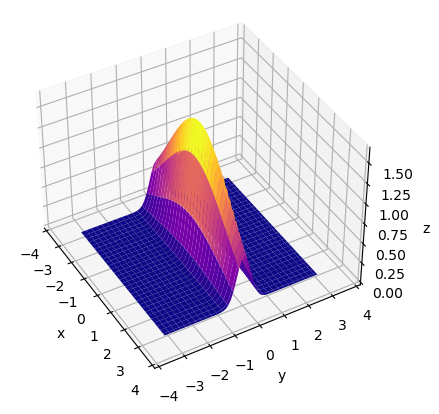

In [62]:
Z3 = Z3.astype(float).reshape(60,60)

X_ = X*1e-20
Y_ = Y*1e-20
Z3_ = Z3*1e-24

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_, Y_, Z3_, cmap='plasma')
ax.set_xlabel('x') #to be constistent with our first convention (sorry for the mess)
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 10)
ax.view_init(40, -30)# rotate the axes (elevation angle, azimuthal angle)
plt.show()

Do the fit

In [63]:
popt, pcov = curve_fit(Ne_fit, x_data, Z3_.ravel(),p0)
perr = np.sqrt(np.diag(pcov))

for i in range(len(popt)):
    print(i, popt[i],'pm',perr[i]/popt[i]*100,'%')

0 1.6527851834257434 pm 1.2807536163314285e-10 %
1 9.52140613691841 pm 3.679095049941149e-10 %
2 0.16681658045275363 pm 2.432612610681802e-10 %


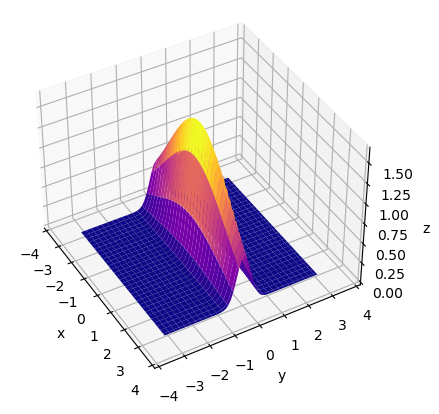

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Z3fit = Ne_fit_plot(X_ , Y_, popt[0], popt[1], popt[2])
ax.plot_surface(X_, Y_, Z3fit, cmap='plasma')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
#ax.set_zlim3d(0, 20)
ax.view_init(40, -30)
plt.show()

Comparison of analytical and numerical lens potential


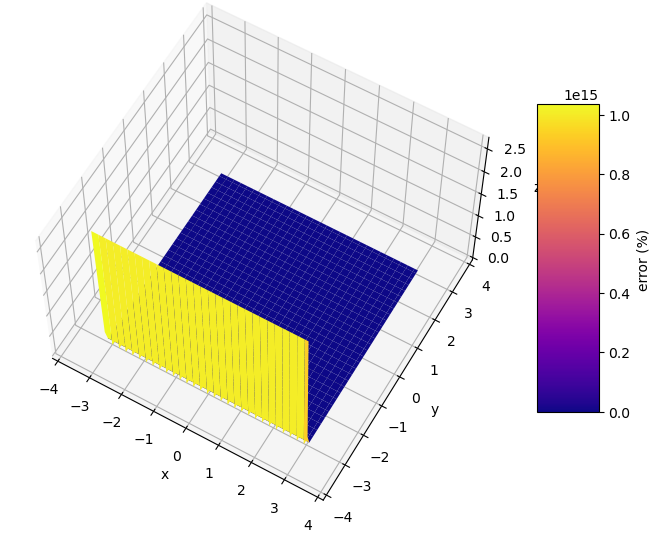

In [65]:
print('Comparison of analytical and numerical lens potential')

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
err = np.abs(Z3_ - Z3fit)/Z3_*100
surf = ax.plot_surface(X_, Y_, err,  cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5, label = 'error (%) ')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.view_init(60, -60)
plt.show()

In [66]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [67]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot3 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


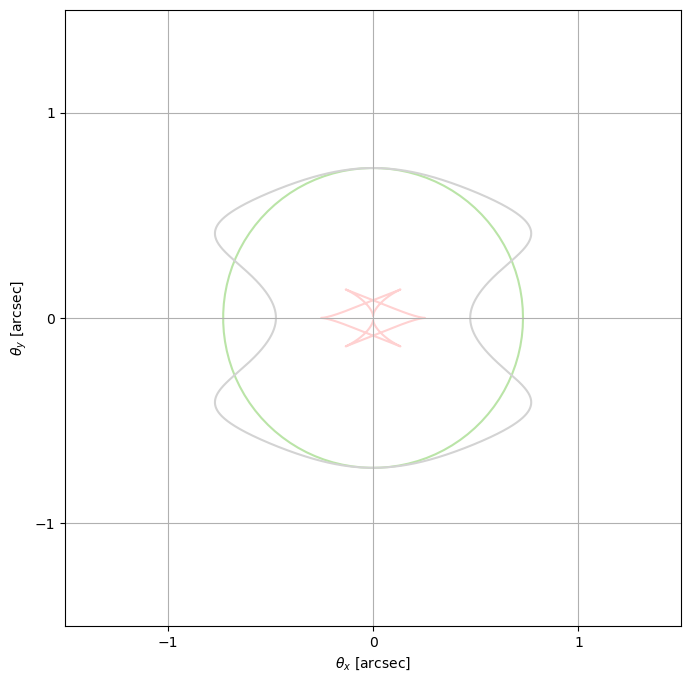

In [68]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))
plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot3[0][0],SSSpgausscantorot3[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot3[2][0],SSSpgausscantorot3[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [69]:
x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, light_p_gauss_canto_rot_3 = main(mesh_x,mesh_y,mesh_light)

time:  0.2583555022875468  minutes


In [70]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

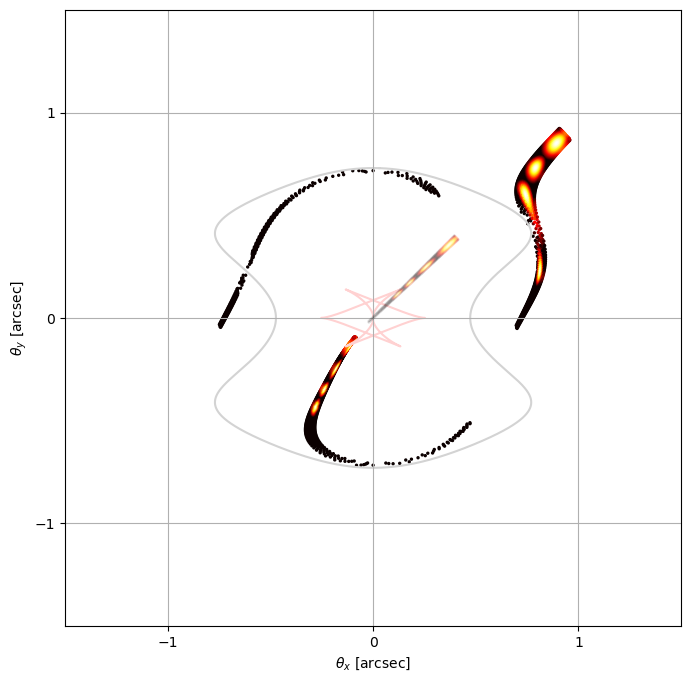

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot3[0][0],SSSpgausscantorot3[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot3[2][0],SSSpgausscantorot3[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_3, y_image_p_gauss_canto_rot_3, c=light_p_gauss_canto_rot_3, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image54.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### $\alpha = 5^o$ y $n_0 = 80\mathrm{cm}^{-3}$

In [72]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':2*popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [73]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot4 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


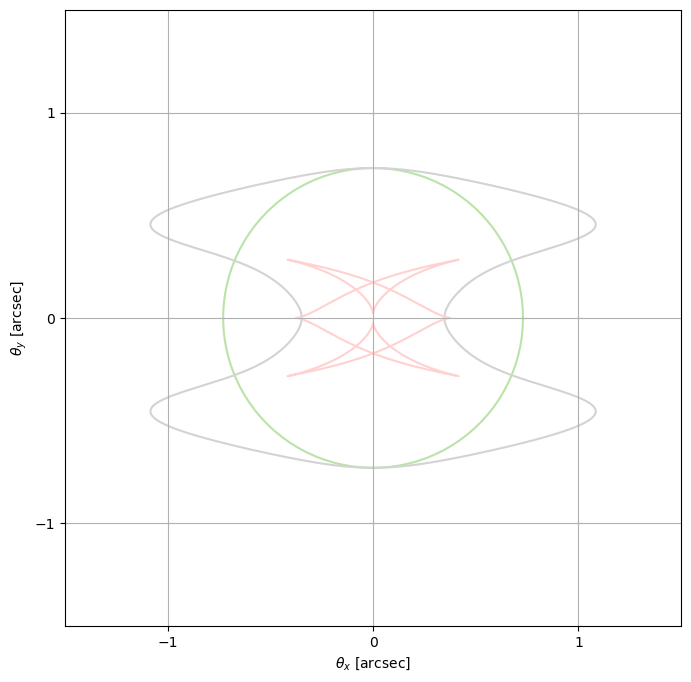

In [74]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))
plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot4[0][0],SSSpgausscantorot4[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot4[2][0],SSSpgausscantorot4[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [75]:
x_image_p_gauss_canto_rot_4, y_image_p_gauss_canto_rot_4, light_p_gauss_canto_rot_4 = main(mesh_x,mesh_y,mesh_light)

time:  0.3673146446545919  minutes


In [76]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

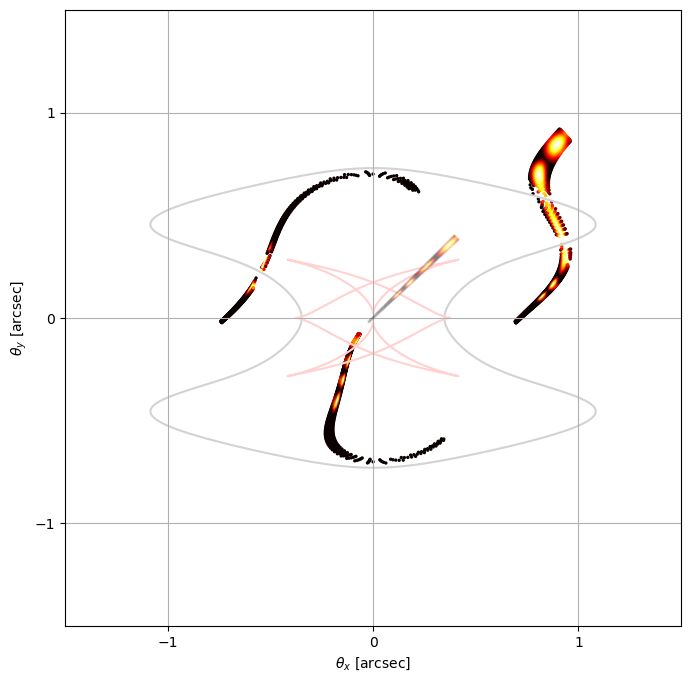

In [77]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot4[0][0],SSSpgausscantorot4[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot4[2][0],SSSpgausscantorot4[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_4, y_image_p_gauss_canto_rot_4, c=light_p_gauss_canto_rot_4, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image54.1.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

### $\alpha = 5^o$ , $n_0 = 40\mathrm{cm}^{-3}$ y $\nu = 80$Mhz

In [78]:
nu = 80.0 * u.MHz
omega = nu*(1.+zl)*2*np.pi

In [79]:
lens_model_list = ['PlasmaGaussianSIEcantorot']
lensModel = LensModel(lens_model_list)
lensEquationSolver = LensEquationSolver(lensModel)

psi0_plasma = (Dls/Ds/Dl*2*np.pi*c_light**2/omega**2*re 
            *(u.rad**2).to('arcsec**2', equivalencies=u.dimensionless_angles()) ).decompose()

kwargs = {'theta_E':theta_E_num.value, 'eta':0*.3, 'A':popt[0], 'B':popt[1], 'C':popt[2], 'psi0_plasma':psi0_plasma.value, 'dl':Dl.decompose().value}
kwargs_lens_list = [kwargs]

In [80]:
lensModelExtensions = LensModelExtensions(lensModel=lensModel)

SSSpgausscantorot5 = lensModelExtensions.critical_curve_caustics(kwargs_lens=kwargs_lens_list, compute_window=5, \
                                                     grid_scale=0.001)


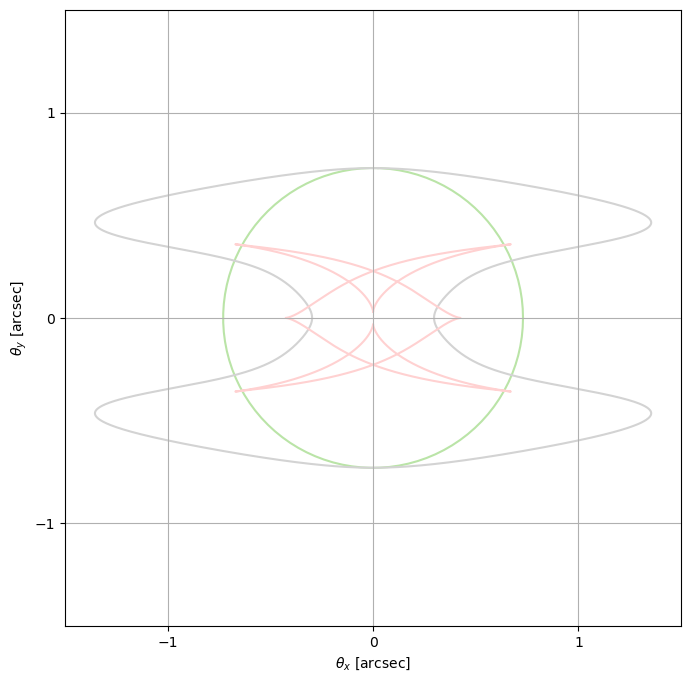

In [81]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))
plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot5[0][0],SSSpgausscantorot5[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot5[2][0],SSSpgausscantorot5[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [82]:
x_image_p_gauss_canto_rot_5, y_image_p_gauss_canto_rot_5, light_p_gauss_canto_rot_5 = main(mesh_x,mesh_y,mesh_light)

time:  0.37109450896581014  minutes


In [83]:
theta = np.linspace(0,2.*np.pi,100)
radius_1 = 0.7301786792241515
x_circle1 = radius_1*np.cos(theta)
y_circle1 = radius_1*np.sin(theta)

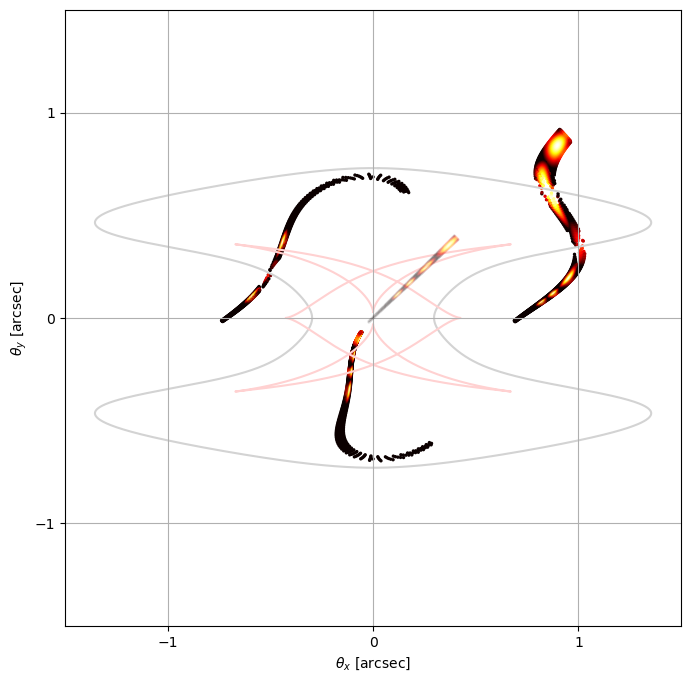

In [84]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xticks(np.arange(-2., 2., 1))
ax.set_yticks(np.arange(-2., 2., 1))

plt.scatter(mesh_x,mesh_y, s =.0005, c=mesh_light, cmap='hot',zorder = 2)
#plt.plot(x_circle1,y_circle1,color='#bae4a7',lw = 1.5,zorder=1)
plt.plot(SSSpgausscantorot5[0][0],SSSpgausscantorot5[1][0], color = '#d3d3d3',zorder=1)
plt.plot(SSSpgausscantorot5[2][0],SSSpgausscantorot5[3][0], color = '#ffd1d1',zorder=1)
ax.set_xlabel(r'$\theta_{x}$ [arcsec]')
ax.set_ylabel(r'$\theta_{y}$ [arcsec]')
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x_image_p_gauss_canto_rot_5, y_image_p_gauss_canto_rot_5, c=light_p_gauss_canto_rot_5, cmap='hot', s = 2)
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
plt.grid()
fig.savefig(my_path + 'image54.2.pdf', format='pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [85]:
end_total = time.time()
print('total time: ',(end_total-start_total)/60.,' minutes')


total time:  20.991507840156554  minutes


Podria haber aproximado los límites y haber hecho
$$
\int_{-\infty}^{\infty}\mathrm{e}^{-ax^2+bx+c} = \dfrac{\sqrt{{\pi}}\mathrm{e}^\frac{4ac+b^2}{4a}}{\sqrt{a}}
$$